In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils
import torch.utils.data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import pandas as pd

In [2]:
# Define the exact solution (Phi1)
def exact_solution_u(x, t):
    return (pi/2*torch.cos(x) + (x-pi/2))*torch.cos(t)

def initial_condition_u(x):
    return (pi/2*torch.cos(x) + (x-pi/2))

def initial_condition_u_t(x):
    return 0.0*pi*torch.cos(x) 

# Define the exact solution(w1)
def exact_solution_p(x, t):
    return pi/2*torch.sin(x)*torch.cos(t)

def initial_condition_p(x):
    return pi/2*torch.sin(x)

def initial_condition_p_t(x):
    return 0*torch.sin(x) 

# Define the exact solution (Phi1)
def exact_solution_u1(x, t):
    return (2/pi)*(pi/2*torch.cos(x) + (x-pi/2))*torch.cos(t)

def initial_condition_u1(x):
    return (2/pi)*(pi/2*torch.cos(x) + (x-pi/2))

def initial_condition_u_t1(x):
    return 0.0*pi*torch.cos(x) 

# Define the exact solution(w1)
def exact_solution_p1(x, t):
    return torch.sin(x)*torch.cos(t)

def initial_condition_p1(x):
    return torch.sin(x)

def initial_condition_p_t1(x):
    return 0*torch.sin(x) 


In [3]:
# importing files

In [4]:
inp_u1 = pd.read_csv(r'timo_data_u1_inverse.csv', header = None)
inp_u2 = pd.read_csv(r'timo_data_u2_inverse.csv', header = None)
inp_u3 = pd.read_csv(r'timo_data_u3_inverse.csv', header = None)
inp_u4 = pd.read_csv(r'timo_data_u4_inverse.csv', header = None)
inp_u5 = pd.read_csv(r'timo_data_u5_inverse.csv', header = None)
inp_u6 = pd.read_csv(r'timo_data_u6_inverse.csv', header = None)
inp_u7 = pd.read_csv(r'timo_data_u7_inverse.csv', header = None)
inp_u8 = pd.read_csv(r'timo_data_u8_inverse.csv', header = None)
inp_u9 = pd.read_csv(r'timo_data_u9_inverse.csv', header = None)
inp_u10 = pd.read_csv(r'timo_data_u10_inverse.csv', header = None)
inp_u11 = pd.read_csv(r'timo_data_u11_inverse.csv', header = None)
inp_u12 = pd.read_csv(r'timo_data_u12_inverse.csv', header = None)
inp_u13 = pd.read_csv(r'timo_data_u13_inverse.csv', header = None)
inp_u14 = pd.read_csv(r'timo_data_u14_inverse.csv', header = None)

In [5]:
inp_p1 = pd.read_csv(r'timo_data_p1_inverse.csv', header = None)
inp_p2 = pd.read_csv(r'timo_data_p2_inverse.csv', header = None)
inp_p3 = pd.read_csv(r'timo_data_p3_inverse.csv', header = None)
inp_p4 = pd.read_csv(r'timo_data_p4_inverse.csv', header = None)
inp_p5 = pd.read_csv(r'timo_data_p5_inverse.csv', header = None)
inp_p6 = pd.read_csv(r'timo_data_p6_inverse.csv', header = None)
inp_p7 = pd.read_csv(r'timo_data_p7_inverse.csv', header = None)
inp_p8 = pd.read_csv(r'timo_data_p8_inverse.csv', header = None)
inp_p9 = pd.read_csv(r'timo_data_p9_inverse.csv', header = None)
inp_p10 = pd.read_csv(r'timo_data_p10_inverse.csv', header = None)
inp_p11 = pd.read_csv(r'timo_data_p11_inverse.csv', header = None)
inp_p12 = pd.read_csv(r'timo_data_p12_inverse.csv', header = None)
inp_p13 = pd.read_csv(r'timo_data_p13_inverse.csv', header = None)
inp_p14 = pd.read_csv(r'timo_data_p14_inverse.csv', header = None)

In [6]:
inp_q1 = pd.read_csv(r'timo_data_q1_inverse.csv', header = None)
inp_q2 = pd.read_csv(r'timo_data_q2_inverse.csv', header = None)
inp_q3 = pd.read_csv(r'timo_data_q3_inverse.csv', header = None)
inp_q4 = pd.read_csv(r'timo_data_q4_inverse.csv', header = None)
inp_q5 = pd.read_csv(r'timo_data_q5_inverse.csv', header = None)
inp_q6 = pd.read_csv(r'timo_data_q6_inverse.csv', header = None)
inp_q7 = pd.read_csv(r'timo_data_q7_inverse.csv', header = None)
inp_q8 = pd.read_csv(r'timo_data_q8_inverse.csv', header = None)
inp_q9 = pd.read_csv(r'timo_data_q9_inverse.csv', header = None)
inp_q10 = pd.read_csv(r'timo_data_q10_inverse.csv', header = None)
inp_q11 = pd.read_csv(r'timo_data_q11_inverse.csv', header = None)
inp_q12 = pd.read_csv(r'timo_data_q12_inverse.csv', header = None)
inp_q13 = pd.read_csv(r'timo_data_q13_inverse.csv', header = None)
inp_q14 = pd.read_csv(r'timo_data_q14_inverse.csv', header = None)

In [7]:
inp_r1 = pd.read_csv(r'timo_data_r1_inverse.csv', header = None)
inp_r2 = pd.read_csv(r'timo_data_r2_inverse.csv', header = None)
inp_r3 = pd.read_csv(r'timo_data_r3_inverse.csv', header = None)
inp_r4 = pd.read_csv(r'timo_data_r4_inverse.csv', header = None)
inp_r5 = pd.read_csv(r'timo_data_r5_inverse.csv', header = None)
inp_r6 = pd.read_csv(r'timo_data_r6_inverse.csv', header = None)
inp_r7 = pd.read_csv(r'timo_data_r7_inverse.csv', header = None)
inp_r8 = pd.read_csv(r'timo_data_r8_inverse.csv', header = None)
inp_r9 = pd.read_csv(r'timo_data_r9_inverse.csv', header = None)
inp_r10 = pd.read_csv(r'timo_data_r10_inverse.csv', header = None)
inp_r11 = pd.read_csv(r'timo_data_r11_inverse.csv', header = None)
inp_r12 = pd.read_csv(r'timo_data_r12_inverse.csv', header = None)
inp_r13 = pd.read_csv(r'timo_data_r13_inverse.csv', header = None)
inp_r14 = pd.read_csv(r'timo_data_r14_inverse.csv', header = None)

In [8]:
inp_u1 = inp_u1[::20]
inp_u2 = inp_u2[::20]
inp_u3 = inp_u3[::20]
inp_u4 = inp_u4[::20]
inp_u5 = inp_u5[::20]
inp_u6 = inp_u6[::20]
inp_u7 = inp_u7[::20]
inp_u8 = inp_u8[::20]
inp_u9 = inp_u9[::20]
inp_u10 = inp_u10[::20]
inp_u11 = inp_u11[::20]
inp_u12 = inp_u12[::20]
inp_u13 = inp_u13[::20]
inp_u14 = inp_u14[::20]

In [9]:
inp_p1 = inp_p1[::20]
inp_p2 = inp_p2[::20]
inp_p3 = inp_p3[::20]
inp_p4 = inp_p4[::20]
inp_p5 = inp_p5[::20]
inp_p6 = inp_p6[::20]
inp_p7 = inp_p7[::20]
inp_p8 = inp_p8[::20]
inp_p9 = inp_p9[::20]
inp_p10 = inp_p10[::20]
inp_p11 = inp_p11[::20]
inp_p12 = inp_p12[::20]
inp_p13 = inp_p13[::20]
inp_p14 = inp_p14[::20]

In [10]:
inp_q1 = inp_q1[::20]
inp_q2 = inp_q2[::20]
inp_q3 = inp_q3[::20]
inp_q4 = inp_q4[::20]
inp_q5 = inp_q5[::20]
inp_q6 = inp_q6[::20]
inp_q7 = inp_q7[::20]
inp_q8 = inp_q8[::20]
inp_q9 = inp_q9[::20]
inp_q10 = inp_q10[::20]
inp_q11 = inp_q11[::20]
inp_q12 = inp_q12[::20]
inp_q13 = inp_q13[::20]
inp_q14 = inp_q14[::20]

In [11]:
inp_r1 = inp_r1[::20]
inp_r2 = inp_r2[::20]
inp_r3 = inp_r3[::20]
inp_r4 = inp_r4[::20]
inp_r5 = inp_r5[::20]
inp_r6 = inp_r6[::20]
inp_r7 = inp_r7[::20]
inp_r8 = inp_r8[::20]
inp_r9 = inp_r9[::20]
inp_r10 = inp_r10[::20]
inp_r11 = inp_r11[::20]
inp_r12 = inp_r12[::20]
inp_r13 = inp_r13[::20]
inp_r14 = inp_r14[::20]

In [12]:
inputs_u1 = inp_u1.to_numpy()
inputs_p1 = inp_p1.to_numpy()
inputs_q1 = inp_q1.to_numpy()
inputs_r1 = inp_r1.to_numpy()
data_t1 = inputs_u1[:,0].astype(np.float32)
data_x1 = inputs_u1[:,1].astype(np.float32)
data_u1 = inputs_u1[:,2].astype(np.float32)
data_p1 = inputs_p1[:,2].astype(np.float32)

data_q1 = inputs_q1[:,2].astype(np.float32)
data_r1 = inputs_r1[:,2].astype(np.float32)

data_t1 = data_t1.reshape(-1, 1)
data_x1 = data_x1.reshape(-1, 1)
data_u1 = data_u1.reshape(-1, 1)
data_p1 = data_p1.reshape(-1, 1)
data_q1 = data_q1.reshape(-1, 1)
data_r1 = data_r1.reshape(-1, 1)



data_t1 = torch.from_numpy(data_t1)
data_x1 = torch.from_numpy(data_x1)
data_u1 = torch.from_numpy(data_u1)
data_p1 = torch.from_numpy(data_p1)
data_q1 = torch.from_numpy(data_q1)
data_r1 = torch.from_numpy(data_r1)
data_inp1 = torch.cat([data_x1, data_t1],1)

In [13]:
inputs_u2 = inp_u2.to_numpy()
inputs_p2 = inp_p2.to_numpy()
inputs_q2 = inp_q2.to_numpy()
inputs_r2 = inp_r2.to_numpy()
data_t2 = inputs_u2[:,0].astype(np.float32)
data_x2 = inputs_u2[:,1].astype(np.float32)
data_u2 = inputs_u2[:,2].astype(np.float32)
data_p2 = inputs_p2[:,2].astype(np.float32)
data_q2 = inputs_q2[:,2].astype(np.float32)
data_r2 = inputs_r2[:,2].astype(np.float32)

data_t2 = data_t2.reshape(-1, 1)
data_x2 = data_x2.reshape(-1, 1)
data_u2 = data_u2.reshape(-1, 1)
data_p2 = data_u2.reshape(-1, 1)
data_q2 = data_u2.reshape(-1, 1)
data_r2 = data_r2.reshape(-1, 1)

data_t2 = torch.from_numpy(data_t2)
data_x2 = torch.from_numpy(data_x2)
data_u2 = torch.from_numpy(data_u2)
data_p2 = torch.from_numpy(data_p2)
data_q2 = torch.from_numpy(data_q2)
data_r2 = torch.from_numpy(data_r2)

data_inp2 = torch.cat([data_x2, data_t2],1)

In [14]:
inputs_u3 = inp_u3.to_numpy()
inputs_p3 = inp_p3.to_numpy()
inputs_q3 = inp_q3.to_numpy()
inputs_r3 = inp_r3.to_numpy()
data_t3 = inputs_u3[:,0].astype(np.float32)
data_x3 = inputs_u3[:,1].astype(np.float32)
data_u3 = inputs_u3[:,2].astype(np.float32)
data_q3 = inputs_q3[:,2].astype(np.float32)
data_r3 = inputs_r3[:,2].astype(np.float32)
data_p3 = inputs_p3[:,2].astype(np.float32)
data_t3 = data_t3.reshape(-1, 1)
data_x3 = data_x3.reshape(-1, 1)
data_u3 = data_u3.reshape(-1, 1)
data_p3 = data_p3.reshape(-1, 1)
data_q3 = data_q3.reshape(-1, 1)
data_r3 = data_r3.reshape(-1, 1)
data_t3 = torch.from_numpy(data_t3)
data_x3 = torch.from_numpy(data_x3)
data_u3 = torch.from_numpy(data_u3)
data_p3 = torch.from_numpy(data_p3)
data_q3 = torch.from_numpy(data_q3)
data_r3 = torch.from_numpy(data_r3)
data_inp3 = torch.cat([data_x3, data_t3],1)

In [15]:
inputs_u4 = inp_u4.to_numpy()
inputs_p4 = inp_p4.to_numpy()
inputs_q4 = inp_q4.to_numpy()
inputs_r4 = inp_r4.to_numpy()
data_t4 = inputs_u4[:,0].astype(np.float32)
data_x4 = inputs_u4[:,1].astype(np.float32)
data_u4 = inputs_u4[:,2].astype(np.float32)
data_p4 = inputs_p4[:,2].astype(np.float32)
data_q4 = inputs_q4[:,2].astype(np.float32)
data_r4 = inputs_r4[:,2].astype(np.float32)


data_t4 = data_t4.reshape(-1, 1)
data_x4 = data_x4.reshape(-1, 1)
data_u4 = data_u4.reshape(-1, 1)
data_p4 = data_p4.reshape(-1, 1)
data_q4 = data_q4.reshape(-1, 1)
data_r4 = data_r4.reshape(-1, 1)

data_t4 = torch.from_numpy(data_t4)
data_x4 = torch.from_numpy(data_x4)
data_u4 = torch.from_numpy(data_u4)
data_p4 = torch.from_numpy(data_p4)
data_q4 = torch.from_numpy(data_q4)
data_r4 = torch.from_numpy(data_r4)
data_inp4 = torch.cat([data_x4, data_t4],1)

In [16]:
inputs_u5 = inp_u5.to_numpy()
inputs_p5 = inp_p5.to_numpy()
inputs_q5 = inp_q5.to_numpy()
inputs_r5 = inp_r5.to_numpy()
data_t5 = inputs_u5[:,0].astype(np.float32)
data_x5 = inputs_u5[:,1].astype(np.float32)
data_u5 = inputs_u5[:,2].astype(np.float32)
data_p5 = inputs_p5[:,2].astype(np.float32)
data_q5 = inputs_q5[:,2].astype(np.float32)
data_r5 = inputs_r5[:,2].astype(np.float32)

data_t5 = data_t5.reshape(-1, 1)
data_x5 = data_x5.reshape(-1, 1)
data_u5 = data_u5.reshape(-1, 1)
data_p5 = data_p5.reshape(-1, 1)
data_q5 = data_q5.reshape(-1, 1)
data_r5 = data_r5.reshape(-1, 1)

data_t5 = torch.from_numpy(data_t5)
data_x5 = torch.from_numpy(data_x5)
data_u5 = torch.from_numpy(data_u5)
data_p5 = torch.from_numpy(data_p5)
data_q5 = torch.from_numpy(data_q5)
data_r5 = torch.from_numpy(data_r5)
data_inp5 = torch.cat([data_x5, data_t5],1)

In [17]:
inputs_u6 = inp_u6.to_numpy()
inputs_p6 = inp_p6.to_numpy()
inputs_q6 = inp_q6.to_numpy()
inputs_r6 = inp_r6.to_numpy()
data_t6 = inputs_u6[:,0].astype(np.float32)
data_x6 = inputs_u6[:,1].astype(np.float32)
data_u6 = inputs_u6[:,2].astype(np.float32)
data_p6 = inputs_p6[:,2].astype(np.float32)
data_q6 = inputs_q6[:,2].astype(np.float32)
data_r6 = inputs_r6[:,2].astype(np.float32)

data_t6 = data_t6.reshape(-1, 1)
data_x6 = data_x6.reshape(-1, 1)
data_u6 = data_u6.reshape(-1, 1)
data_p6 = data_p6.reshape(-1, 1)
data_q6 = data_q6.reshape(-1, 1)
data_r6 = data_r6.reshape(-1, 1)

data_t6 = torch.from_numpy(data_t6)
data_x6 = torch.from_numpy(data_x6)
data_u6 = torch.from_numpy(data_u6)
data_p6 = torch.from_numpy(data_p6)
data_q6 = torch.from_numpy(data_q6)
data_r6 = torch.from_numpy(data_r6)

data_inp6 = torch.cat([data_x6, data_t6],1)

In [18]:
inputs_u7 = inp_u7.to_numpy()
inputs_p7 = inp_p7.to_numpy()
inputs_q7 = inp_q7.to_numpy()
inputs_r7 = inp_r7.to_numpy()
data_t7 = inputs_u7[:,0].astype(np.float32)
data_x7 = inputs_u7[:,1].astype(np.float32)
data_u7 = inputs_u7[:,2].astype(np.float32)
data_p7 = inputs_p7[:,2].astype(np.float32)
data_q7 = inputs_q7[:,2].astype(np.float32)
data_r7 = inputs_r7[:,2].astype(np.float32)


data_t7 = data_t7.reshape(-1, 1)
data_x7 = data_x7.reshape(-1, 1)
data_u7 = data_u7.reshape(-1, 1)
data_p7 = data_p7.reshape(-1, 1)
data_q7 = data_q7.reshape(-1, 1)
data_r7 = data_r7.reshape(-1, 1)

data_t7 = torch.from_numpy(data_t7)
data_x7 = torch.from_numpy(data_x7)
data_u7 = torch.from_numpy(data_u7)
data_p7 = torch.from_numpy(data_p7)
data_q7 = torch.from_numpy(data_q7)
data_r7 = torch.from_numpy(data_r7)

data_inp7 = torch.cat([data_x7, data_t7],1)

In [19]:
inputs_u8 = inp_u8.to_numpy()
inputs_p8 = inp_p8.to_numpy()
inputs_q8 = inp_q8.to_numpy()
inputs_r8 = inp_r8.to_numpy()
data_t8 = inputs_u8[:,0].astype(np.float32)
data_x8 = inputs_u8[:,1].astype(np.float32)
data_u8 = inputs_u8[:,2].astype(np.float32)
data_p8 = inputs_p8[:,2].astype(np.float32)
data_q8 = inputs_q8[:,2].astype(np.float32)
data_r8 = inputs_r8[:,2].astype(np.float32)
data_t8 = data_t8.reshape(-1, 1)
data_x8 = data_x8.reshape(-1, 1)
data_u8 = data_u8.reshape(-1, 1)
data_p8 = data_p8.reshape(-1, 1)
data_q8 = data_q8.reshape(-1, 1)
data_r8 = data_r8.reshape(-1, 1)


data_t8 = torch.from_numpy(data_t8)
data_x8 = torch.from_numpy(data_x8)
data_u8 = torch.from_numpy(data_u8)
data_p8 = torch.from_numpy(data_p8)
data_q8 = torch.from_numpy(data_q8)
data_r8 = torch.from_numpy(data_r8)
data_inp8 = torch.cat([data_x8, data_t8],1)

In [20]:
inputs_u9 = inp_u9.to_numpy()
inputs_p9 = inp_p9.to_numpy()
inputs_q9 = inp_q9.to_numpy()
inputs_r9 = inp_r9.to_numpy()

data_t9 = inputs_u9[:,0].astype(np.float32)
data_x9 = inputs_u9[:,1].astype(np.float32)

data_u9 = inputs_u9[:,2].astype(np.float32)
data_p9 = inputs_p9[:,2].astype(np.float32)
data_q9 = inputs_q9[:,2].astype(np.float32)
data_r9 = inputs_r9[:,2].astype(np.float32)

data_t9 = data_t9.reshape(-1, 1)
data_x9 = data_x9.reshape(-1, 1)
data_u9 = data_u9.reshape(-1, 1)
data_p9 = data_p9.reshape(-1, 1)
data_q9 = data_q9.reshape(-1, 1)
data_r9 = data_r9.reshape(-1, 1)

data_t9 = torch.from_numpy(data_t9)
data_x9 = torch.from_numpy(data_x9)
data_u9 = torch.from_numpy(data_u9)
data_p9 = torch.from_numpy(data_p9)
data_q9 = torch.from_numpy(data_q9)
data_r9 = torch.from_numpy(data_r9)
data_inp9 = torch.cat([data_x9, data_t9],1)

In [21]:
inputs_u10 = inp_u10.to_numpy()
inputs_p10 = inp_p10.to_numpy()
inputs_q10 = inp_q10.to_numpy()
inputs_r10 = inp_r10.to_numpy()

data_t10 = inputs_u10[:,0].astype(np.float32)
data_x10 = inputs_u10[:,1].astype(np.float32)
data_u10 = inputs_u10[:,2].astype(np.float32)
data_p10 = inputs_p10[:,2].astype(np.float32)
data_q10 = inputs_q10[:,2].astype(np.float32)
data_r10 = inputs_r10[:,2].astype(np.float32)

data_t10 = data_t10.reshape(-1, 1)
data_x10 = data_x10.reshape(-1, 1)
data_u10 = data_u10.reshape(-1, 1)
data_p10 = data_p10.reshape(-1, 1)
data_q10 = data_q10.reshape(-1, 1)
data_r10 = data_r10.reshape(-1, 1)

data_t10 = torch.from_numpy(data_t10)
data_x10 = torch.from_numpy(data_x10)
data_u10 = torch.from_numpy(data_u10)
data_p10 = torch.from_numpy(data_p10)
data_q10 = torch.from_numpy(data_q10)
data_r10 = torch.from_numpy(data_r10)
data_inp10 = torch.cat([data_x10, data_t10],1)

In [22]:
inputs_u11 = inp_u11.to_numpy()
inputs_p11 = inp_p11.to_numpy()
inputs_q11 = inp_q11.to_numpy()
inputs_r11 = inp_r11.to_numpy()

data_t11 = inputs_u11[:,0].astype(np.float32)
data_x11 = inputs_u11[:,1].astype(np.float32)
data_u11 = inputs_u11[:,2].astype(np.float32)
data_p11 = inputs_p11[:,2].astype(np.float32)
data_q11 = inputs_q11[:,2].astype(np.float32)
data_r11 = inputs_r11[:,2].astype(np.float32)


data_t11 = data_t11.reshape(-1, 1)
data_x11 = data_x11.reshape(-1, 1)
data_u11 = data_u11.reshape(-1, 1)
data_p11 = data_p11.reshape(-1, 1)
data_q11 = data_q11.reshape(-1, 1)
data_r11 = data_r11.reshape(-1, 1)




data_t11 = torch.from_numpy(data_t11)
data_x11 = torch.from_numpy(data_x11)
data_u11 = torch.from_numpy(data_u11)
data_p11 = torch.from_numpy(data_p11)
data_q11 = torch.from_numpy(data_q11)
data_r11 = torch.from_numpy(data_r11)

data_inp11 = torch.cat([data_x11, data_t11],1)

In [23]:
inputs_u12 = inp_u12.to_numpy()
inputs_p12 = inp_p12.to_numpy()
inputs_q12 = inp_q12.to_numpy()
inputs_r12 = inp_r12.to_numpy()

data_t12 = inputs_u12[:,0].astype(np.float32)
data_x12 = inputs_u12[:,1].astype(np.float32)
data_u12 = inputs_u12[:,2].astype(np.float32)
data_p12 = inputs_p12[:,2].astype(np.float32)
data_q12 = inputs_q12[:,2].astype(np.float32)
data_r12 = inputs_r12[:,2].astype(np.float32)



data_t12 = data_t12.reshape(-1, 1)
data_x12 = data_x12.reshape(-1, 1)
data_u12 = data_u12.reshape(-1, 1)
data_p12 = data_p12.reshape(-1, 1)
data_q12 = data_q12.reshape(-1, 1)
data_r12 = data_r12.reshape(-1, 1)

data_t12 = torch.from_numpy(data_t12)
data_x12 = torch.from_numpy(data_x12)
data_u12 = torch.from_numpy(data_u12)
data_p12 = torch.from_numpy(data_p12)
data_q12 = torch.from_numpy(data_q12)
data_r12 = torch.from_numpy(data_r12)
data_inp12 = torch.cat([data_x12, data_t12],1)

In [24]:
inputs_u13 = inp_u13.to_numpy()
inputs_p13 = inp_p13.to_numpy()
inputs_q13 = inp_q13.to_numpy()
inputs_r13 = inp_r13.to_numpy()

data_t13 = inputs_u13[:,0].astype(np.float32)
data_x13 = inputs_u13[:,1].astype(np.float32)
data_u13 = inputs_u13[:,2].astype(np.float32)
data_p13 = inputs_p13[:,2].astype(np.float32)
data_q13 = inputs_q13[:,2].astype(np.float32)
data_r13 = inputs_r13[:,2].astype(np.float32)

data_t13 = data_t13.reshape(-1, 1)
data_x13 = data_x13.reshape(-1, 1)
data_u13 = data_u13.reshape(-1, 1)
data_p13 = data_p13.reshape(-1, 1)
data_q13 = data_q13.reshape(-1, 1)
data_r13 = data_r13.reshape(-1, 1)

data_t13 = torch.from_numpy(data_t13)
data_x13 = torch.from_numpy(data_x13)
data_u13 = torch.from_numpy(data_u13)
data_p13 = torch.from_numpy(data_p13)
data_q13 = torch.from_numpy(data_q13)
data_r13 = torch.from_numpy(data_r13)
data_inp13 = torch.cat([data_x13, data_t13],1)

In [25]:
inputs_u14 = inp_u14.to_numpy()
inputs_p14 = inp_p14.to_numpy()
inputs_q14 = inp_q14.to_numpy()
inputs_r14 = inp_r14.to_numpy()

data_t14 = inputs_u14[:,0].astype(np.float32)
data_x14 = inputs_u14[:,1].astype(np.float32)
data_u14 = inputs_u14[:,2].astype(np.float32)
data_p14 = inputs_p14[:,2].astype(np.float32)
data_q14 = inputs_q14[:,2].astype(np.float32)
data_r14 = inputs_r14[:,2].astype(np.float32)

data_t14 = data_t14.reshape(-1, 1)
data_x14 = data_x14.reshape(-1, 1)
data_u14 = data_u14.reshape(-1, 1)
data_p14 = data_p14.reshape(-1, 1)
data_q14 = data_q14.reshape(-1, 1)
data_r14 = data_r14.reshape(-1, 1)

data_t14 = torch.from_numpy(data_t14)
data_x14 = torch.from_numpy(data_x14)
data_u14 = torch.from_numpy(data_u14)
data_p14 = torch.from_numpy(data_p14)
data_q14 = torch.from_numpy(data_q14)
data_r14 = torch.from_numpy(data_r14)
data_inp14 = torch.cat([data_x14, data_t14],1)

In [26]:
# noise level
sigma = 0.1
data_u1 = data_u1*(1+sigma*torch.randn(data_u1.shape))
data_p1 = data_p1*(1+sigma*torch.randn(data_p1.shape))
data_q1 = data_q1*(1+sigma*torch.randn(data_q1.shape))
data_r1 = data_r1*(1+sigma*torch.randn(data_r1.shape))

data_u4 = data_u4*(1+sigma*torch.randn(data_u4.shape))
data_p4 = data_p4*(1+sigma*torch.randn(data_p4.shape))
data_q4 = data_q4*(1+sigma*torch.randn(data_q4.shape))
data_r4 = data_r4*(1+sigma*torch.randn(data_r4.shape))

data_u14 = data_u14*(1+sigma*torch.randn(data_u14.shape))
data_p14 = data_p14*(1+sigma*torch.randn(data_p14.shape))
data_q14 = data_q14*(1+sigma*torch.randn(data_q14.shape))
data_r14 = data_r14*(1+sigma*torch.randn(data_r14.shape))

data_u12 = data_u12*(1+sigma*torch.randn(data_u12.shape))
data_p12 = data_p12*(1+sigma*torch.randn(data_p12.shape))
data_q12 = data_q12*(1+sigma*torch.randn(data_q12.shape))
data_r12 = data_r12*(1+sigma*torch.randn(data_r12.shape))


data_u8 = data_u8*(1+sigma*torch.randn(data_u8.shape))
data_p8 = data_p8*(1+sigma*torch.randn(data_p8.shape))
data_q8 = data_q8*(1+sigma*torch.randn(data_q8.shape))
data_r8 = data_r8*(1+sigma*torch.randn(data_r8.shape))

data_u10 = data_u10*(1+sigma*torch.randn(data_u10.shape))
data_p10 = data_p10*(1+sigma*torch.randn(data_p10.shape))
data_q10 = data_q10*(1+sigma*torch.randn(data_q10.shape))
data_r10 = data_r10*(1+sigma*torch.randn(data_r10.shape))

In [27]:
# assigning number of points
initial_pts = 2000
left_boundary_pts = 2000
right_boundary_pts = 2000
residual_pts = 10000
# Type of optimizer (ADAM or LBFGS)
opt_type = "LBFGS"
manualSeed = 1

#np.random.seed(manualSeed)
#random.seed(manualSeed)
torch.manual_seed(manualSeed)

x_init = pi*torch.rand((initial_pts,1)) # initial pts
t_init = 0*x_init
init =  torch.cat([x_init, t_init],1)
u_init = initial_condition_u(init[:,0]).reshape(-1, 1)
p_init = initial_condition_p(init[:,0]).reshape(-1, 1)
u1_init = initial_condition_u1(init[:,0]).reshape(-1, 1)
p1_init = initial_condition_p1(init[:,0]).reshape(-1, 1)
w_init = torch.cat([u_init, p_init, u1_init, p1_init],1)

u_t_init = initial_condition_u_t(init[:,0]).reshape(-1, 1)
p_t_init = initial_condition_p_t(init[:,0]).reshape(-1, 1)
u1_t_init = initial_condition_u_t1(init[:,0]).reshape(-1, 1)
p1_t_init = initial_condition_p_t1(init[:,0]).reshape(-1, 1)
w_t_init = torch.cat([u_t_init, p_t_init, u1_t_init, p1_t_init],1)



xb_left = torch.zeros((left_boundary_pts, 1)) # left spatial boundary
tb_left = torch.rand((left_boundary_pts, 1)) # 
b_left = torch.cat([xb_left, tb_left ],1)
u_b_l = exact_solution_u(xb_left, tb_left)
p_b_l = exact_solution_p(xb_left, tb_left)
u1_b_l = exact_solution_u1(xb_left, tb_left)
p1_b_l = exact_solution_p1(xb_left, tb_left)
w_b_l = torch.cat([u_b_l, p_b_l, u1_b_l, p1_b_l],1)



xb_right = pi*torch.ones((right_boundary_pts, 1)) # right spatial boundary
tb_right = torch.rand((right_boundary_pts, 1)) # right boundary pts
b_right = torch.cat([xb_right, tb_right ],1)
u_b_r = exact_solution_u(xb_right, tb_right)
p_b_r = exact_solution_p(xb_right, tb_right)
u1_b_r = exact_solution_u1(xb_right, tb_right)
p1_b_r = exact_solution_p1(xb_right, tb_right)
w_b_r = torch.cat([u_b_r, p_b_r, u1_b_r, p1_b_r],1)

x_interior = pi*torch.rand((residual_pts, 1))
t_interior = torch.rand((residual_pts, 1))
interior = torch.cat([x_interior, t_interior],1)





training_set = DataLoader(torch.utils.data.TensorDataset(init, w_init, w_t_init, b_left,  b_right), batch_size=2000, shuffle=False)

class NeuralNet(nn.Module):

    def __init__(self, input_dimension, output_dimension, n_hidden_layers, neurons):
        super(NeuralNet, self).__init__()
        # Number of input dimensions n
        self.input_dimension = input_dimension
        # Number of output dimensions m
        self.output_dimension = output_dimension
        # Number of neurons per layer 
        self.neurons = neurons
        # Number of hidden layers 
        self.n_hidden_layers = n_hidden_layers
        # Activation function 
        self.activation = nn.Tanh()
        
        self.input_layer = nn.Linear(self.input_dimension, self.neurons)
        self.hidden_layers = nn.ModuleList([nn.Linear(self.neurons, self.neurons) for _ in range(n_hidden_layers)])
        self.output_layer = nn.Linear(self.neurons, self.output_dimension)

    def forward(self, x):
        # The forward function performs the set of affine and non-linear transformations defining the network 
        # (see equation above)
        x = self.activation(self.input_layer(x))
        for k, l in enumerate(self.hidden_layers):
            x = self.activation(l(x))
        return self.output_layer(x)
# Model definition
my_network = NeuralNet(input_dimension = init.shape[1], output_dimension = 5, n_hidden_layers=4, neurons=20)

def init_xavier(model, retrain_seed):
    torch.manual_seed(retrain_seed)
    def init_weights(m):
        if type(m) == nn.Linear and m.weight.requires_grad and m.bias.requires_grad:
            g = nn.init.calculate_gain('tanh')
            torch.nn.init.xavier_uniform_(m.weight, gain=g)
            #torch.nn.init.xavier_normal_(m.weight, gain=g)
            m.bias.data.fill_(0)
    model.apply(init_weights)

# Random Seed for weight initialization
retrain = 128
# Xavier weight initialization
init_xavier(my_network, retrain)
#print(my_network(init))

if opt_type == "ADAM":
    optimizer_ = optim.Adam(my_network.parameters(), lr=0.001)
elif opt_type == "LBFGS":
    optimizer_ = optim.LBFGS(my_network.parameters(), lr=0.1, max_iter=1, max_eval=50000, tolerance_change=1.0 * np.finfo(float).eps)
else:
    raise ValueError("Optimizer not recognized")
    
def fit(model, training_set, interior, num_epochs, optimizer, p, verbose=True):
    history = list()
    
    # Loop over epochs
    for epoch in range(num_epochs):
        if verbose: print("################################ ", epoch, " ################################")

        running_loss = list([0])
        
        # Loop over batches
        for j, (initial, w_initial, w_initial_t, bd_left,  bd_right) in enumerate(training_set):
            
            def closure():
                # zero the parameter gradients
                optimizer.zero_grad()
                                
                bd_left.requires_grad = True
                bd_right.requires_grad = True
                # for initial
                initial.requires_grad = True
                w_initial_pred_ = model(initial)
                u_initial_pred_ = w_initial_pred_[:,0].reshape(-1,1)
                p_initial_pred_ = w_initial_pred_[:,1].reshape(-1,1)
                u1_initial_pred_ = w_initial_pred_[:,2].reshape(-1,1)
                p1_initial_pred_ = w_initial_pred_[:,3].reshape(-1,1)
                
                

                
                
                # with derivative
                inpu = torch.ones(initial_pts, 1 )
                
                grad_u_ini = torch.autograd.grad(u_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                
                u_initial_t = grad_u_ini[:, 1]
                
                
                grad_p_ini = torch.autograd.grad(p_initial_pred_, initial, grad_outputs=inpu, create_graph=True)[0]
                
                p_initial_t = grad_p_ini[:, 1]
                
                grad_u1_ini = torch.autograd.grad(u1_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                
                u1_initial_t = grad_u1_ini[:, 1]
                
                
                grad_p1_ini = torch.autograd.grad(p1_initial_pred_, initial, grad_outputs=inpu, create_graph=True)[0]
                
                p1_initial_t = grad_p1_ini[:, 1]
                
                
                

                
                

                # for left boundary
                w_bd_left_pred_ = model(bd_left)
                u_bd_left_pred_ = w_bd_left_pred_[:,0].reshape(-1,1)
                p_bd_left_pred_ = w_bd_left_pred_[:,1].reshape(-1,1)
                
                u1_bd_left_pred_ = w_bd_left_pred_[:,2].reshape(-1,1)
                p1_bd_left_pred_ = w_bd_left_pred_[:,3].reshape(-1,1)
                
                # for right boundary
                w_bd_right_pred_ = model(bd_right)
                u_bd_right_pred_ = w_bd_right_pred_[:,0].reshape(-1,1)
                p_bd_right_pred_ = w_bd_right_pred_[:,1].reshape(-1,1)
                
                u1_bd_right_pred_ = w_bd_right_pred_[:,2].reshape(-1,1)
                p1_bd_right_pred_ = w_bd_right_pred_[:,3].reshape(-1,1)
                


                inputs2 = torch.ones(left_boundary_pts, 1)
                inputs3 = torch.ones(right_boundary_pts, 1)
                grad_u_b_l = torch.autograd.grad(u_bd_left_pred_, bd_left, grad_outputs=inputs2, create_graph=True)[0]
                grad_u_b_r = torch.autograd.grad(u_bd_right_pred_, bd_right, grad_outputs=inputs3, create_graph=True)[0]
                u_b_l_x = grad_u_b_l[:, 0]
                u_b_r_x = grad_u_b_r[:, 0]
                
                u_b_l_xx = torch.autograd.grad(u_b_l_x, bd_left, grad_outputs=torch.ones(bd_left.shape[0]), create_graph=True)[0]
                u_bd_left_xx = u_b_l_xx[:, 0].reshape(-1,1)

                u_b_r_xx = torch.autograd.grad(u_b_r_x, bd_right, grad_outputs=torch.ones(bd_right.shape[0]), create_graph=True)[0]
                u_bd_right_xx = u_b_r_xx[:, 0].reshape(-1,1)
                
                inputs4 = torch.ones(left_boundary_pts, 1)
                inputs5 = torch.ones(right_boundary_pts, 1)
                grad_v_b_l = torch.autograd.grad(p_bd_left_pred_, bd_left, grad_outputs=inputs4, create_graph=True)[0]
                grad_v_b_r = torch.autograd.grad(p_bd_right_pred_, bd_right, grad_outputs=inputs5, create_graph=True)[0]
                v_b_l_x = grad_v_b_l[:, 0]
                v_b_r_x = grad_v_b_r[:, 0]
                
                v_b_l_xx = torch.autograd.grad(v_b_l_x, bd_left, grad_outputs=torch.ones(bd_left.shape[0]), create_graph=True)[0]
                v_bd_left_xx = v_b_l_xx[:, 0].reshape(-1,1)

                v_b_r_xx = torch.autograd.grad(v_b_r_x, bd_right, grad_outputs=torch.ones(bd_right.shape[0]), create_graph=True)[0]
                v_bd_right_xx = v_b_r_xx[:, 0].reshape(-1,1)
                

                
                
                
               
                # predicted force
                # (1-torch.sin(interior[:, 0]))*torch.cos(interior[:, 1]).reshape(-1, )
                
                # residual calculation
                interior.requires_grad = True
                w_hat = model(interior)
                u_hat = w_hat[:,0].reshape(-1,1)
                p_hat = w_hat[:,1].reshape(-1,1)
                u1_hat = w_hat[:,2].reshape(-1,1)
                p1_hat = w_hat[:,3].reshape(-1,1)
                
                inputs = torch.ones(residual_pts, 1 )
                inputs2 = torch.ones(residual_pts, 1)
                grad_u_hat = torch.autograd.grad(u_hat.reshape(-1,1), interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_x = grad_u_hat[:, 0].reshape(-1,1)
                
                grad_u_hat_xx = torch.autograd.grad(u_x, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_xx = grad_u_hat_xx[:, 0].reshape(-1,1)
                
                grad_u_hat_xxx = torch.autograd.grad(u_xx, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_xxx = grad_u_hat_xxx[:, 0].reshape(-1,1)
                
                grad_u_hat_xxxx = torch.autograd.grad(u_xxx, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_xxxx = grad_u_hat_xxxx[:, 0].reshape(-1,1)
                
                
                
                
                
                grad_p_hat = torch.autograd.grad(p_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_x = grad_p_hat[:, 0].reshape(-1,1)
                
                grad_p_hat_xx = torch.autograd.grad(p_x, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_xx = grad_p_hat_xx[:, 0].reshape(-1,1)
                
                grad_p_hat_xxx = torch.autograd.grad(p_xx, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_xxx = grad_p_hat_xxx[:, 0].reshape(-1,1)
                
                grad_p_hat_xxxx = torch.autograd.grad(p_xxx, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_xxxx = grad_p_hat_xxxx[:, 0].reshape(-1,1)
                
                
                grad_u1_hat = torch.autograd.grad(u1_hat.reshape(-1,1), interior, grad_outputs=inputs, create_graph=True)[0]
                
                u1_x = grad_u1_hat[:, 0].reshape(-1,1)
                
                grad_u1_hat_xx = torch.autograd.grad(u1_x, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u1_xx = grad_u1_hat_xx[:, 0].reshape(-1,1)
                
                
                
                
                grad_p1_hat = torch.autograd.grad(p1_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p1_x = grad_p1_hat[:, 0].reshape(-1,1)
                
                grad_p1_hat_xx = torch.autograd.grad(p1_x, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p1_xx = grad_p1_hat_xx[:, 0].reshape(-1,1)
                
                
                
                
                

                
                
                
                
                #grad_grad_u_x = torch.autograd.grad(u_x, interior, grad_outputs=torch.ones(interior.shape[0]), create_graph=True)[0]
                #u_xx = grad_grad_u_x[:, 0]
                u_t = grad_u_hat[:, 1].reshape(-1,1)
                
                grad_u_hat_tt = torch.autograd.grad(u_t, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u_tt = grad_u_hat_tt[:, 1].reshape(-1,1)
                
                p_t = grad_p_hat[:,1].reshape(-1,1)
                grad_p_hat_tt = torch.autograd.grad(p_t, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p_tt = grad_p_hat_tt[:, 1].reshape(-1,1)
                
                
                u1_t = grad_u1_hat[:, 1].reshape(-1,1)
                
                grad_u1_hat_tt = torch.autograd.grad(u1_t, interior, grad_outputs=inputs, create_graph=True)[0]
                
                u1_tt = grad_u1_hat_tt[:, 1].reshape(-1,1)
                
                p1_t = grad_p1_hat[:,1].reshape(-1,1)
                grad_p1_hat_tt = torch.autograd.grad(p1_t, interior, grad_outputs=inputs, create_graph=True)[0]
                
                p1_tt = grad_p1_hat_tt[:, 1].reshape(-1,1)
                
                
                
                # data
                
                u_data_pred1 = model(data_inp1)
                
                u_data_pred2 = model(data_inp2)
                
                u_data_pred3 = model(data_inp3)
                
                u_data_pred4 = model(data_inp4)
               
                u_data_pred5 = model(data_inp5)
                
                u_data_pred6 = model(data_inp6)
                
                u_data_pred7 = model(data_inp7)
                
                u_data_pred8 = model(data_inp8)
                
                u_data_pred9 = model(data_inp9)
                
                u_data_pred10 = model(data_inp10)
                
                u_data_pred11 = model(data_inp11)
                
                u_data_pred12 = model(data_inp12)
                
                u_data_pred13 = model(data_inp13)
                
                u_data_pred14 = model(data_inp14)
                
                # p_data and u_data
                data = torch.mean((u_data_pred1[:,1].reshape(-1, )- data_p1.reshape(-1, ))**p) + torch.mean((u_data_pred4[:,1].reshape(-1, ) - data_p4.reshape(-1, ))**p)
                data1 = torch.mean((u_data_pred1[:,0].reshape(-1, )- data_u1.reshape(-1, ))**p) + torch.mean((u_data_pred4[:,0].reshape(-1, ) - data_u4.reshape(-1, ))**p)
                
                data2 = torch.mean((u_data_pred14[:,1].reshape(-1, )- data_p14.reshape(-1, ))**p) +  torch.mean((u_data_pred12[:,1].reshape(-1, ) - data_p12.reshape(-1, ))**p)
                data3 = torch.mean((u_data_pred14[:,0].reshape(-1, )- data_u14.reshape(-1, ))**p) + torch.mean((u_data_pred12[:,0].reshape(-1, ) - data_u12.reshape(-1, ))**p)
                data4 =  torch.mean((u_data_pred8[:,1].reshape(-1, ) - data_p8.reshape(-1, ))**p) + torch.mean((u_data_pred10[:,1].reshape(-1, ) - data_p10.reshape(-1, ))**p) 
                data5 =  torch.mean((u_data_pred8[:,0].reshape(-1, ) - data_u8.reshape(-1, ))**p) + torch.mean((u_data_pred10[:,0].reshape(-1, ) - data_u10.reshape(-1, ))**p)
                
                # data_q and data_r
                data6 = torch.mean((u_data_pred1[:,2].reshape(-1, )- data_q1.reshape(-1, ))**p) + torch.mean((u_data_pred4[:,2].reshape(-1, ) - data_q4.reshape(-1, ))**p)
                data7 = torch.mean((u_data_pred1[:,3].reshape(-1, )- data_r1.reshape(-1, ))**p) + torch.mean((u_data_pred4[:,3].reshape(-1, ) - data_r4.reshape(-1, ))**p)
                
                data8 = torch.mean((u_data_pred14[:,2].reshape(-1, )- data_q14.reshape(-1, ))**p) +  torch.mean((u_data_pred12[:,2].reshape(-1, ) - data_q12.reshape(-1, ))**p)
                data9 = torch.mean((u_data_pred14[:,3].reshape(-1, )- data_r14.reshape(-1, ))**p) + torch.mean((u_data_pred12[:,3].reshape(-1, ) - data_r12.reshape(-1, ))**p)
                data10 =  torch.mean((u_data_pred8[:,2].reshape(-1, ) - data_q8.reshape(-1, ))**p) + torch.mean((u_data_pred10[:,2].reshape(-1, ) - data_q10.reshape(-1, ))**p) 
                data11 =  torch.mean((u_data_pred8[:,3].reshape(-1, ) - data_r8.reshape(-1, ))**p) + torch.mean((u_data_pred10[:,3].reshape(-1, ) - data_r10.reshape(-1, ))**p)
                
                   
                
                
                
                
                # Item 1. below
                loss1 = torch.mean((u_initial_t.reshape(-1, ) - w_initial_t[:,0].reshape(-1, ))**p)+torch.mean((u_initial_pred_.reshape(-1, ) - w_initial[:,0].reshape(-1, ))**p) + torch.mean((u_x.reshape(-1, ) - p_xx.reshape(-1, ) + p_tt.reshape(-1, ) + p_hat.reshape(-1, )-p1_hat.reshape(-1, ) - w_hat[:,4].reshape(-1,))**p) + torch.mean((u_bd_left_pred_.reshape(-1,)- u_b_l.reshape(-1,))**p) + torch.mean((u_bd_right_pred_.reshape(-1,)- u_b_r.reshape(-1,))**p)
                
                
                loss2 = torch.mean((p_initial_pred_.reshape(-1, ) - w_initial[:,1].reshape(-1, ))**p)+ torch.mean((p_initial_t.reshape(-1, ) - w_initial_t[:,1].reshape(-1, ))**p) + torch.mean((u_xx.reshape(-1, )  + p_x.reshape(-1, ) - u_tt.reshape(-1, ) - u_hat.reshape(-1, ))**p)+torch.mean((p_bd_left_pred_.reshape(-1,)- p_b_l.reshape(-1,))**p) + torch.mean((p_bd_right_pred_.reshape(-1,)- p_b_r.reshape(-1,))**p)

                loss3 = torch.mean((u1_initial_t.reshape(-1, ) - w_initial_t[:,2].reshape(-1, ))**p)+torch.mean((u1_initial_pred_.reshape(-1, ) - w_initial[:,2].reshape(-1, ))**p) + torch.mean((u1_x.reshape(-1, ) - p1_xx.reshape(-1, ) + p1_tt.reshape(-1, ) + p1_hat.reshape(-1, ) - p_hat.reshape(-1, ).reshape(-1, )-(2/pi)*torch.cos(interior[:, 1])+pi/2*torch.sin(interior[:,0])*torch.cos(interior[:, 1]))**p) + torch.mean((u1_bd_left_pred_.reshape(-1,))**p) + torch.mean((u1_bd_right_pred_.reshape(-1,))**p)
                
                loss4 = torch.mean((p1_initial_pred_.reshape(-1, ) - w_initial[:,3].reshape(-1, ))**p)+ torch.mean((p1_initial_t.reshape(-1, ) - w_initial_t[:,3].reshape(-1, ))**p) + torch.mean((u1_xx.reshape(-1, )  + p1_x.reshape(-1, ) - u1_tt.reshape(-1, ) - u1_hat.reshape(-1, ))**p)+torch.mean((p1_bd_left_pred_.reshape(-1,))**p) + torch.mean((p1_bd_right_pred_.reshape(-1,))**p)
                


                loss = loss1 + loss2 + loss3 + loss4 + data + data1 + data2 + data3 + data4 + data5 + data9 + data10 + data11 + data7 
                #loss = torch.max(torch.abs((u_initial_pred_.reshape(-1, ) - u_initial.reshape(-1, )))) + torch.max(torch.abs((u_t.reshape(-1, ) - u_xx.reshape(-1, ))))+torch.max(torch.abs((u_bd_left_pred_.reshape(-1,)))) + torch.max(torch.abs((u_bd_right_pred_.reshape(-1,))))
 
                # + data6  ++ data8
                # Item 2. below
                loss.backward()
                # Compute average training loss over batches for the current epoch
                running_loss[0] += loss.item()
                return loss
            
            # Item 3. below
            optimizer.step(closure=closure)
            
        print('Loss: ', (running_loss[0] / len(training_set)))
        history.append(running_loss[0])

    return history
n_epochs = 15000
#history = fit(my_network, training_set, interior, n_epochs, optimizer_, p=2, verbose=True )


################################  0  ################################
Loss:  164.82662963867188
################################  1  ################################
Loss:  161.71551513671875
################################  2  ################################
Loss:  138.42657470703125
################################  3  ################################
Loss:  95.72338104248047
################################  4  ################################
Loss:  63.60383224487305
################################  5  ################################
Loss:  58.23013687133789
################################  6  ################################
Loss:  52.59105682373047
################################  7  ################################
Loss:  46.94864273071289
################################  8  ################################
Loss:  41.53556823730469
################################  9  ################################
Loss:  36.393829345703125
################################  10  ########

Loss:  0.47224268317222595
################################  87  ################################
Loss:  0.45440536737442017
################################  88  ################################
Loss:  0.43781808018684387
################################  89  ################################
Loss:  0.42249253392219543
################################  90  ################################
Loss:  0.4076199531555176
################################  91  ################################
Loss:  0.39321091771125793
################################  92  ################################
Loss:  0.37881121039390564
################################  93  ################################
Loss:  0.3651634454727173
################################  94  ################################
Loss:  0.35361555218696594
################################  95  ################################
Loss:  0.3429679274559021
################################  96  ################################
Loss:  0.33302262425422

Loss:  0.09769095480442047
################################  171  ################################
Loss:  0.09720675647258759
################################  172  ################################
Loss:  0.09672943502664566
################################  173  ################################
Loss:  0.09625441581010818
################################  174  ################################
Loss:  0.09577686339616776
################################  175  ################################
Loss:  0.09529145807027817
################################  176  ################################
Loss:  0.09479670971632004
################################  177  ################################
Loss:  0.09431052953004837
################################  178  ################################
Loss:  0.0938403531908989
################################  179  ################################
Loss:  0.0933871939778328
################################  180  ################################
Loss:  0.092

Loss:  0.07365816831588745
################################  255  ################################
Loss:  0.07355226576328278
################################  256  ################################
Loss:  0.07344771176576614
################################  257  ################################
Loss:  0.07334490865468979
################################  258  ################################
Loss:  0.0732484757900238
################################  259  ################################
Loss:  0.07316356152296066
################################  260  ################################
Loss:  0.07308316230773926
################################  261  ################################
Loss:  0.07300324738025665
################################  262  ################################
Loss:  0.07292183488607407
################################  263  ################################
Loss:  0.07283923774957657
################################  264  ################################
Loss:  0.07

Loss:  0.06801961362361908
################################  339  ################################
Loss:  0.06799647212028503
################################  340  ################################
Loss:  0.06797236204147339
################################  341  ################################
Loss:  0.06794928014278412
################################  342  ################################
Loss:  0.06792718172073364
################################  343  ################################
Loss:  0.06790552288293839
################################  344  ################################
Loss:  0.06788472831249237
################################  345  ################################
Loss:  0.06786449253559113
################################  346  ################################
Loss:  0.06784538179636002
################################  347  ################################
Loss:  0.06782694160938263
################################  348  ################################
Loss:  0.0

Loss:  0.06675973534584045
################################  422  ################################
Loss:  0.06674619019031525
################################  423  ################################
Loss:  0.06673229485750198
################################  424  ################################
Loss:  0.06671856343746185
################################  425  ################################
Loss:  0.06670430302619934
################################  426  ################################
Loss:  0.06669203191995621
################################  427  ################################
Loss:  0.06668102741241455
################################  428  ################################
Loss:  0.06667018681764603
################################  429  ################################
Loss:  0.06666050851345062
################################  430  ################################
Loss:  0.06665149331092834
################################  431  ################################
Loss:  0.0

Loss:  0.06611333042383194
################################  505  ################################
Loss:  0.06610739231109619
################################  506  ################################
Loss:  0.06610194593667984
################################  507  ################################
Loss:  0.06609679758548737
################################  508  ################################
Loss:  0.06609189510345459
################################  509  ################################
Loss:  0.06608682870864868
################################  510  ################################
Loss:  0.06608188897371292
################################  511  ################################
Loss:  0.06607770919799805
################################  512  ################################
Loss:  0.06607155501842499
################################  513  ################################
Loss:  0.06606835126876831
################################  514  ################################
Loss:  0.0

Loss:  0.06567228585481644
################################  588  ################################
Loss:  0.06566968560218811
################################  589  ################################
Loss:  0.06566722691059113
################################  590  ################################
Loss:  0.06566488742828369
################################  591  ################################
Loss:  0.06566262990236282
################################  592  ################################
Loss:  0.06566047668457031
################################  593  ################################
Loss:  0.06565836817026138
################################  594  ################################
Loss:  0.06565622240304947
################################  595  ################################
Loss:  0.06565425544977188
################################  596  ################################
Loss:  0.0656522810459137
################################  597  ################################
Loss:  0.06

Loss:  0.06548910588026047
################################  672  ################################
Loss:  0.06548753380775452
################################  673  ################################
Loss:  0.06548595428466797
################################  674  ################################
Loss:  0.06548437476158142
################################  675  ################################
Loss:  0.06548281759023666
################################  676  ################################
Loss:  0.06548122316598892
################################  677  ################################
Loss:  0.06547968834638596
################################  678  ################################
Loss:  0.06547822058200836
################################  679  ################################
Loss:  0.06547682732343674
################################  680  ################################
Loss:  0.06547553092241287
################################  681  ################################
Loss:  0.0

Loss:  0.06537221372127533
################################  755  ################################
Loss:  0.06537088751792908
################################  756  ################################
Loss:  0.0653696283698082
################################  757  ################################
Loss:  0.0653684213757515
################################  758  ################################
Loss:  0.0653671994805336
################################  759  ################################
Loss:  0.06536609679460526
################################  760  ################################
Loss:  0.06536492705345154
################################  761  ################################
Loss:  0.06536387652158737
################################  762  ################################
Loss:  0.06536278873682022
################################  763  ################################
Loss:  0.06536157429218292
################################  764  ################################
Loss:  0.0653

Loss:  0.06525244563817978
################################  838  ################################
Loss:  0.06525105983018875
################################  839  ################################
Loss:  0.06524983793497086
################################  840  ################################
Loss:  0.0652485266327858
################################  841  ################################
Loss:  0.0652470514178276
################################  842  ################################
Loss:  0.06524579972028732
################################  843  ################################
Loss:  0.06524459272623062
################################  844  ################################
Loss:  0.06524335592985153
################################  845  ################################
Loss:  0.06524185836315155
################################  846  ################################
Loss:  0.06524091213941574
################################  847  ################################
Loss:  0.065

Loss:  0.0651569589972496
################################  921  ################################
Loss:  0.06515583395957947
################################  922  ################################
Loss:  0.06515495479106903
################################  923  ################################
Loss:  0.06515403836965561
################################  924  ################################
Loss:  0.0651530921459198
################################  925  ################################
Loss:  0.06515207886695862
################################  926  ################################
Loss:  0.06515095382928848
################################  927  ################################
Loss:  0.06514979898929596
################################  928  ################################
Loss:  0.06514868140220642
################################  929  ################################
Loss:  0.0651475340127945
################################  930  ################################
Loss:  0.0651

Loss:  0.06507745385169983
################################  1004  ################################
Loss:  0.06507695466279984
################################  1005  ################################
Loss:  0.06507642567157745
################################  1006  ################################
Loss:  0.0650760754942894
################################  1007  ################################
Loss:  0.06507578492164612
################################  1008  ################################
Loss:  0.06507545709609985
################################  1009  ################################
Loss:  0.06507503986358643
################################  1010  ################################
Loss:  0.06507467478513718
################################  1011  ################################
Loss:  0.06507433205842972
################################  1012  ################################
Loss:  0.06507396697998047
################################  1013  ################################
L

Loss:  0.06503170728683472
################################  1087  ################################
Loss:  0.06503128260374069
################################  1088  ################################
Loss:  0.06503082811832428
################################  1089  ################################
Loss:  0.06503034383058548
################################  1090  ################################
Loss:  0.06502985209226608
################################  1091  ################################
Loss:  0.06502922624349594
################################  1092  ################################
Loss:  0.06502866744995117
################################  1093  ################################
Loss:  0.06502796709537506
################################  1094  ################################
Loss:  0.0650271475315094
################################  1095  ################################
Loss:  0.06502649188041687
################################  1096  ################################
L

Loss:  0.06499766558408737
################################  1170  ################################
Loss:  0.06499701738357544
################################  1171  ################################
Loss:  0.06499634683132172
################################  1172  ################################
Loss:  0.06499569118022919
################################  1173  ################################
Loss:  0.06499505043029785
################################  1174  ################################
Loss:  0.06499440222978592
################################  1175  ################################
Loss:  0.06499375402927399
################################  1176  ################################
Loss:  0.06499314308166504
################################  1177  ################################
Loss:  0.06499254703521729
################################  1178  ################################
Loss:  0.06499198079109192
################################  1179  ################################


Loss:  0.06496264040470123
################################  1253  ################################
Loss:  0.06496237963438034
################################  1254  ################################
Loss:  0.06496211141347885
################################  1255  ################################
Loss:  0.06496186554431915
################################  1256  ################################
Loss:  0.06496162712574005
################################  1257  ################################
Loss:  0.06496139615774155
################################  1258  ################################
Loss:  0.06496119499206543
################################  1259  ################################
Loss:  0.06496096402406693
################################  1260  ################################
Loss:  0.06496068835258484
################################  1261  ################################
Loss:  0.06496047973632812
################################  1262  ################################


Loss:  0.06493831425905228
################################  1336  ################################
Loss:  0.06493809074163437
################################  1337  ################################
Loss:  0.06493786722421646
################################  1338  ################################
Loss:  0.06493762880563736
################################  1339  ################################
Loss:  0.06493739783763885
################################  1340  ################################
Loss:  0.06493714451789856
################################  1341  ################################
Loss:  0.06493690609931946
################################  1342  ################################
Loss:  0.06493666023015976
################################  1343  ################################
Loss:  0.06493639945983887
################################  1344  ################################
Loss:  0.0649360716342926
################################  1345  ################################
L

Loss:  0.064913310110569
################################  1419  ################################
Loss:  0.06491313874721527
################################  1420  ################################
Loss:  0.06491295993328094
################################  1421  ################################
Loss:  0.064912810921669
################################  1422  ################################
Loss:  0.06491266191005707
################################  1423  ################################
Loss:  0.06491248309612274
################################  1424  ################################
Loss:  0.064912348985672
################################  1425  ################################
Loss:  0.06491217762231827
################################  1426  ################################
Loss:  0.06491199880838394
################################  1427  ################################
Loss:  0.06491179764270782
################################  1428  ################################
Loss: 

Loss:  0.06488709896802902
################################  1502  ################################
Loss:  0.06488694995641708
################################  1503  ################################
Loss:  0.06488683074712753
################################  1504  ################################
Loss:  0.06488670408725739
################################  1505  ################################
Loss:  0.06488660722970963
################################  1506  ################################
Loss:  0.06488649547100067
################################  1507  ################################
Loss:  0.06488639861345291
################################  1508  ################################
Loss:  0.06488630920648575
################################  1509  ################################
Loss:  0.06488622725009918
################################  1510  ################################
Loss:  0.06488613784313202
################################  1511  ################################


Loss:  0.0648743137717247
################################  1585  ################################
Loss:  0.06487416476011276
################################  1586  ################################
Loss:  0.06487402319908142
################################  1587  ################################
Loss:  0.06487390398979187
################################  1588  ################################
Loss:  0.06487379223108292
################################  1589  ################################
Loss:  0.06487369537353516
################################  1590  ################################
Loss:  0.064873605966568
################################  1591  ################################
Loss:  0.06487350910902023
################################  1592  ################################
Loss:  0.06487342715263367
################################  1593  ################################
Loss:  0.06487333029508591
################################  1594  ################################
Los

Loss:  0.06486324965953827
################################  1668  ################################
Loss:  0.06486313045024872
################################  1669  ################################
Loss:  0.06486301869153976
################################  1670  ################################
Loss:  0.06486289203166962
################################  1671  ################################
Loss:  0.06486278027296066
################################  1672  ################################
Loss:  0.06486266851425171
################################  1673  ################################
Loss:  0.06486255675554276
################################  1674  ################################
Loss:  0.0648624375462532
################################  1675  ################################
Loss:  0.06486232578754425
################################  1676  ################################
Loss:  0.06486222892999649
################################  1677  ################################
L

Loss:  0.06485176831483841
################################  1751  ################################
Loss:  0.06485158950090408
################################  1752  ################################
Loss:  0.06485141813755035
################################  1753  ################################
Loss:  0.06485123187303543
################################  1754  ################################
Loss:  0.06485104560852051
################################  1755  ################################
Loss:  0.0648508369922638
################################  1756  ################################
Loss:  0.06485062837600708
################################  1757  ################################
Loss:  0.06485043466091156
################################  1758  ################################
Loss:  0.06485024094581604
################################  1759  ################################
Loss:  0.06485006958246231
################################  1760  ################################
L

Loss:  0.06484223157167435
################################  1834  ################################
Loss:  0.06484214216470718
################################  1835  ################################
Loss:  0.06484206765890121
################################  1836  ################################
Loss:  0.06484199315309525
################################  1837  ################################
Loss:  0.06484192609786987
################################  1838  ################################
Loss:  0.0648418441414833
################################  1839  ################################
Loss:  0.06484173983335495
################################  1840  ################################
Loss:  0.06484159827232361
################################  1841  ################################
Loss:  0.06484151631593704
################################  1842  ################################
Loss:  0.06484142690896988
################################  1843  ################################
L

Loss:  0.06483310461044312
################################  1917  ################################
Loss:  0.06483302265405655
################################  1918  ################################
Loss:  0.06483293324708939
################################  1919  ################################
Loss:  0.06483280658721924
################################  1920  ################################
Loss:  0.06483273953199387
################################  1921  ################################
Loss:  0.0648326650261879
################################  1922  ################################
Loss:  0.06483258306980133
################################  1923  ################################
Loss:  0.06483250111341476
################################  1924  ################################
Loss:  0.0648324266076088
################################  1925  ################################
Loss:  0.06483234465122223
################################  1926  ################################
Lo

Loss:  0.06482673436403275
################################  2000  ################################
Loss:  0.06482665240764618
################################  2001  ################################
Loss:  0.06482653319835663
################################  2002  ################################
Loss:  0.06482712179422379
################################  2003  ################################
Loss:  0.06482688337564468
################################  2004  ################################
Loss:  0.06482667475938797
################################  2005  ################################
Loss:  0.06482646614313126
################################  2006  ################################
Loss:  0.06482628732919693
################################  2007  ################################
Loss:  0.0648261234164238
################################  2008  ################################
Loss:  0.06482596695423126
################################  2009  ################################
L

Loss:  0.06482061743736267
################################  2083  ################################
Loss:  0.06482046842575073
################################  2084  ################################
Loss:  0.06482026726007462
################################  2085  ################################
Loss:  0.0648200660943985
################################  2086  ################################
Loss:  0.06481985747814178
################################  2087  ################################
Loss:  0.06481962651014328
################################  2088  ################################
Loss:  0.06481943279504776
################################  2089  ################################
Loss:  0.06481922417879105
################################  2090  ################################
Loss:  0.06481902301311493
################################  2091  ################################
Loss:  0.06481881439685822
################################  2092  ################################
L

Loss:  0.06481296569108963
################################  2166  ################################
Loss:  0.06481292843818665
################################  2167  ################################
Loss:  0.06481289863586426
################################  2168  ################################
Loss:  0.06481288373470306
################################  2169  ################################
Loss:  0.06481283903121948
################################  2170  ################################
Loss:  0.0648128017783165
################################  2171  ################################
Loss:  0.06481275707483292
################################  2172  ################################
Loss:  0.06481269747018814
################################  2173  ################################
Loss:  0.06481263786554337
################################  2174  ################################
Loss:  0.06481257826089859
################################  2175  ################################
L

Loss:  0.06480813026428223
################################  2249  ################################
Loss:  0.06480801105499268
################################  2250  ################################
Loss:  0.06480789929628372
################################  2251  ################################
Loss:  0.06480778753757477
################################  2252  ################################
Loss:  0.06480766087770462
################################  2253  ################################
Loss:  0.06480753421783447
################################  2254  ################################
Loss:  0.06480740010738373
################################  2255  ################################
Loss:  0.06480728089809418
################################  2256  ################################
Loss:  0.06480713933706284
################################  2257  ################################
Loss:  0.06480703502893448
################################  2258  ################################


Loss:  0.06480122357606888
################################  2332  ################################
Loss:  0.0648011863231659
################################  2333  ################################
Loss:  0.06480114161968231
################################  2334  ################################
Loss:  0.06480107456445694
################################  2335  ################################
Loss:  0.06480103731155396
################################  2336  ################################
Loss:  0.06480098515748978
################################  2337  ################################
Loss:  0.0648009404540062
################################  2338  ################################
Loss:  0.06480090320110321
################################  2339  ################################
Loss:  0.06480085849761963
################################  2340  ################################
Loss:  0.06480082124471664
################################  2341  ################################
Lo

Loss:  0.06479764729738235
################################  2415  ################################
Loss:  0.06479756534099579
################################  2416  ################################
Loss:  0.06479747593402863
################################  2417  ################################
Loss:  0.06479743123054504
################################  2418  ################################
Loss:  0.06479734927415848
################################  2419  ################################
Loss:  0.0647972822189331
################################  2420  ################################
Loss:  0.06479720771312714
################################  2421  ################################
Loss:  0.06479714065790176
################################  2422  ################################
Loss:  0.0647970661520958
################################  2423  ################################
Loss:  0.06479699909687042
################################  2424  ################################
Lo

Loss:  0.06479302048683167
################################  2498  ################################
Loss:  0.06479296833276749
################################  2499  ################################
Loss:  0.06479288637638092
################################  2500  ################################
Loss:  0.06479282677173615
################################  2501  ################################
Loss:  0.06479275971651077
################################  2502  ################################
Loss:  0.0647927075624466
################################  2503  ################################
Loss:  0.06479264795780182
################################  2504  ################################
Loss:  0.06479257345199585
################################  2505  ################################
Loss:  0.06479250639677048
################################  2506  ################################
Loss:  0.06479243189096451
################################  2507  ################################
L

Loss:  0.06478782743215561
################################  2580  ################################
Loss:  0.06478773057460785
################################  2581  ################################
Loss:  0.06478767096996307
################################  2582  ################################
Loss:  0.06478758901357651
################################  2583  ################################
Loss:  0.06478751450777054
################################  2584  ################################
Loss:  0.06478743255138397
################################  2585  ################################
Loss:  0.0647873505949974
################################  2586  ################################
Loss:  0.06478726863861084
################################  2587  ################################
Loss:  0.06478720158338547
################################  2588  ################################
Loss:  0.0647871196269989
################################  2589  ################################
Lo

Loss:  0.06478281319141388
################################  2663  ################################
Loss:  0.0647827535867691
################################  2664  ################################
Loss:  0.06478266417980194
################################  2665  ################################
Loss:  0.06478258967399597
################################  2666  ################################
Loss:  0.06478248536586761
################################  2667  ################################
Loss:  0.06478239595890045
################################  2668  ################################
Loss:  0.06478229910135269
################################  2669  ################################
Loss:  0.06478220969438553
################################  2670  ################################
Loss:  0.06478209793567657
################################  2671  ################################
Loss:  0.06478198617696762
################################  2672  ################################
L

Loss:  0.06477592885494232
################################  2746  ################################
Loss:  0.06477586179971695
################################  2747  ################################
Loss:  0.06477581709623337
################################  2748  ################################
Loss:  0.06477577239274979
################################  2749  ################################
Loss:  0.0647757276892662
################################  2750  ################################
Loss:  0.06477568298578262
################################  2751  ################################
Loss:  0.06477564573287964
################################  2752  ################################
Loss:  0.06477559357881546
################################  2753  ################################
Loss:  0.06477553397417068
################################  2754  ################################
Loss:  0.0647754892706871
################################  2755  ################################
Lo

Loss:  0.06477157026529312
################################  2829  ################################
Loss:  0.06477154791355133
################################  2830  ################################
Loss:  0.06477151066064835
################################  2831  ################################
Loss:  0.06477148830890656
################################  2832  ################################
Loss:  0.06477146595716476
################################  2833  ################################
Loss:  0.06477143615484238
################################  2834  ################################
Loss:  0.06477142125368118
################################  2835  ################################
Loss:  0.06477139890193939
################################  2836  ################################
Loss:  0.0647713765501976
################################  2837  ################################
Loss:  0.06477135419845581
################################  2838  ################################
L

Loss:  0.06476931273937225
################################  2912  ################################
Loss:  0.06476928293704987
################################  2913  ################################
Loss:  0.06476923823356628
################################  2914  ################################
Loss:  0.0647692009806633
################################  2915  ################################
Loss:  0.06476917862892151
################################  2916  ################################
Loss:  0.06476915627717972
################################  2917  ################################
Loss:  0.06476911902427673
################################  2918  ################################
Loss:  0.06476909667253494
################################  2919  ################################
Loss:  0.06476906687021255
################################  2920  ################################
Loss:  0.06476903706789017
################################  2921  ################################
L

Loss:  0.06476607173681259
################################  2995  ################################
Loss:  0.0647660493850708
################################  2996  ################################
Loss:  0.06476601958274841
################################  2997  ################################
Loss:  0.06476598978042603
################################  2998  ################################
Loss:  0.06476595997810364
################################  2999  ################################
Loss:  0.06476593017578125
################################  3000  ################################
Loss:  0.06476590037345886
################################  3001  ################################
Loss:  0.06476587057113647
################################  3002  ################################
Loss:  0.06476583331823349
################################  3003  ################################
Loss:  0.0647657960653305
################################  3004  ################################
Lo

Loss:  0.06476488709449768
################################  3078  ################################
Loss:  0.06476487964391708
################################  3079  ################################
Loss:  0.06476486474275589
################################  3080  ################################
Loss:  0.06476485729217529
################################  3081  ################################
Loss:  0.0647648498415947
################################  3082  ################################
Loss:  0.0647648423910141
################################  3083  ################################
Loss:  0.0647648349404335
################################  3084  ################################
Loss:  0.0647648274898529
################################  3085  ################################
Loss:  0.06476482003927231
################################  3086  ################################
Loss:  0.06476479768753052
################################  3087  ################################
Loss

Loss:  0.06476272642612457
################################  3161  ################################
Loss:  0.06476269662380219
################################  3162  ################################
Loss:  0.06476268172264099
################################  3163  ################################
Loss:  0.0647626519203186
################################  3164  ################################
Loss:  0.064762644469738
################################  3165  ################################
Loss:  0.06476260721683502
################################  3166  ################################
Loss:  0.06476259231567383
################################  3167  ################################
Loss:  0.06476257741451263
################################  3168  ################################
Loss:  0.06476256251335144
################################  3169  ################################
Loss:  0.06476253271102905
################################  3170  ################################
Los

Loss:  0.06476019322872162
################################  3244  ################################
Loss:  0.06476016342639923
################################  3245  ################################
Loss:  0.06476012617349625
################################  3246  ################################
Loss:  0.06476008892059326
################################  3247  ################################
Loss:  0.06476004421710968
################################  3248  ################################
Loss:  0.0647600069642067
################################  3249  ################################
Loss:  0.06475994735956192
################################  3250  ################################
Loss:  0.06475989520549774
################################  3251  ################################
Loss:  0.06475985050201416
################################  3252  ################################
Loss:  0.06475980579853058
################################  3253  ################################
L

Loss:  0.06475850939750671
################################  3327  ################################
Loss:  0.06475848704576492
################################  3328  ################################
Loss:  0.06475849449634552
################################  3329  ################################
Loss:  0.06475849449634552
################################  3330  ################################
Loss:  0.06475848704576492
################################  3331  ################################
Loss:  0.06475847214460373
################################  3332  ################################
Loss:  0.06475847214460373
################################  3333  ################################
Loss:  0.06475844979286194
################################  3334  ################################
Loss:  0.06475844979286194
################################  3335  ################################
Loss:  0.06475844234228134
################################  3336  ################################


Loss:  0.06475726515054703
################################  3410  ################################
Loss:  0.06475724279880524
################################  3411  ################################
Loss:  0.06475720554590225
################################  3412  ################################
Loss:  0.06475717574357986
################################  3413  ################################
Loss:  0.06475716084241867
################################  3414  ################################
Loss:  0.06475713104009628
################################  3415  ################################
Loss:  0.06475710868835449
################################  3416  ################################
Loss:  0.0647570863366127
################################  3417  ################################
Loss:  0.06475704908370972
################################  3418  ################################
Loss:  0.06475701928138733
################################  3419  ################################
L

Loss:  0.06475525349378586
################################  3493  ################################
Loss:  0.06475523114204407
################################  3494  ################################
Loss:  0.06475520133972168
################################  3495  ################################
Loss:  0.06475517898797989
################################  3496  ################################
Loss:  0.0647551491856575
################################  3497  ################################
Loss:  0.06475512683391571
################################  3498  ################################
Loss:  0.06475510448217392
################################  3499  ################################
Loss:  0.06475508958101273
################################  3500  ################################
Loss:  0.06475505977869034
################################  3501  ################################
Loss:  0.06475504487752914
################################  3502  ################################
L

Loss:  0.0647534653544426
################################  3576  ################################
Loss:  0.06475342065095901
################################  3577  ################################
Loss:  0.06475339084863663
################################  3578  ################################
Loss:  0.06475333869457245
################################  3579  ################################
Loss:  0.06475329399108887
################################  3580  ################################
Loss:  0.06475325673818588
################################  3581  ################################
Loss:  0.0647532269358635
################################  3582  ################################
Loss:  0.06475318968296051
################################  3583  ################################
Loss:  0.06475315243005753
################################  3584  ################################
Loss:  0.06475311517715454
################################  3585  ################################
Lo

Loss:  0.06475097686052322
################################  3659  ################################
Loss:  0.06475096940994263
################################  3660  ################################
Loss:  0.06475095450878143
################################  3661  ################################
Loss:  0.06475093215703964
################################  3662  ################################
Loss:  0.06475090980529785
################################  3663  ################################
Loss:  0.06475090235471725
################################  3664  ################################
Loss:  0.06475088745355606
################################  3665  ################################
Loss:  0.06475088000297546
################################  3666  ################################
Loss:  0.06475087255239487
################################  3667  ################################
Loss:  0.06475086510181427
################################  3668  ################################


Loss:  0.06474971771240234
################################  3742  ################################
Loss:  0.06474971026182175
################################  3743  ################################
Loss:  0.06474969536066055
################################  3744  ################################
Loss:  0.06474969536066055
################################  3745  ################################
Loss:  0.06474969536066055
################################  3746  ################################
Loss:  0.06474967300891876
################################  3747  ################################
Loss:  0.06474966555833817
################################  3748  ################################
Loss:  0.06474965810775757
################################  3749  ################################
Loss:  0.06474964320659637
################################  3750  ################################
Loss:  0.06474963575601578
################################  3751  ################################


Loss:  0.06474856287240982
################################  3825  ################################
Loss:  0.06474854052066803
################################  3826  ################################
Loss:  0.06474853307008743
################################  3827  ################################
Loss:  0.06474852561950684
################################  3828  ################################
Loss:  0.06474851816892624
################################  3829  ################################
Loss:  0.06474851816892624
################################  3830  ################################
Loss:  0.06474851071834564
################################  3831  ################################
Loss:  0.06474850326776505
################################  3832  ################################
Loss:  0.06474849581718445
################################  3833  ################################
Loss:  0.06474849581718445
################################  3834  ################################


Loss:  0.06474770605564117
################################  3908  ################################
Loss:  0.06474769115447998
################################  3909  ################################
Loss:  0.06474767625331879
################################  3910  ################################
Loss:  0.06474766135215759
################################  3911  ################################
Loss:  0.0647476390004158
################################  3912  ################################
Loss:  0.06474761664867401
################################  3913  ################################
Loss:  0.06474761664867401
################################  3914  ################################
Loss:  0.06474760174751282
################################  3915  ################################
Loss:  0.06474759429693222
################################  3916  ################################
Loss:  0.06474757939577103
################################  3917  ################################
L

Loss:  0.0647462010383606
################################  3991  ################################
Loss:  0.0647461861371994
################################  3992  ################################
Loss:  0.0647461786866188
################################  3993  ################################
Loss:  0.06474615633487701
################################  3994  ################################
Loss:  0.06474614888429642
################################  3995  ################################
Loss:  0.06474613398313522
################################  3996  ################################
Loss:  0.06474613398313522
################################  3997  ################################
Loss:  0.06474611908197403
################################  3998  ################################
Loss:  0.06474611163139343
################################  3999  ################################
Loss:  0.06474610418081284
################################  4000  ################################
Los

Loss:  0.06474501639604568
################################  4074  ################################
Loss:  0.06474500894546509
################################  4075  ################################
Loss:  0.06474500894546509
################################  4076  ################################
Loss:  0.06474500149488449
################################  4077  ################################
Loss:  0.06474500149488449
################################  4078  ################################
Loss:  0.06474500149488449
################################  4079  ################################
Loss:  0.0647449865937233
################################  4080  ################################
Loss:  0.0647449865937233
################################  4081  ################################
Loss:  0.0647449865937233
################################  4082  ################################
Loss:  0.0647449791431427
################################  4083  ################################
Loss

Loss:  0.06474420428276062
################################  4157  ################################
Loss:  0.06474418193101883
################################  4158  ################################
Loss:  0.06474416702985764
################################  4159  ################################
Loss:  0.06474415957927704
################################  4160  ################################
Loss:  0.06474415212869644
################################  4161  ################################
Loss:  0.06474412977695465
################################  4162  ################################
Loss:  0.06474412977695465
################################  4163  ################################
Loss:  0.06474411487579346
################################  4164  ################################
Loss:  0.06474411487579346
################################  4165  ################################
Loss:  0.06474409997463226
################################  4166  ################################


Loss:  0.06474269181489944
################################  4240  ################################
Loss:  0.06474266946315765
################################  4241  ################################
Loss:  0.06474264711141586
################################  4242  ################################
Loss:  0.06474263221025467
################################  4243  ################################
Loss:  0.06474260985851288
################################  4244  ################################
Loss:  0.06474258750677109
################################  4245  ################################
Loss:  0.0647425651550293
################################  4246  ################################
Loss:  0.0647425577044487
################################  4247  ################################
Loss:  0.0647425428032875
################################  4248  ################################
Loss:  0.06474251300096512
################################  4249  ################################
Los

Loss:  0.06474173069000244
################################  4323  ################################
Loss:  0.06474171578884125
################################  4324  ################################
Loss:  0.06474170833826065
################################  4325  ################################
Loss:  0.06474170088768005
################################  4326  ################################
Loss:  0.06474167108535767
################################  4327  ################################
Loss:  0.06474167108535767
################################  4328  ################################
Loss:  0.06474165618419647
################################  4329  ################################
Loss:  0.06474164873361588
################################  4330  ################################
Loss:  0.06474164128303528
################################  4331  ################################
Loss:  0.06474162638187408
################################  4332  ################################


Loss:  0.0647406280040741
################################  4406  ################################
Loss:  0.0647406205534935
################################  4407  ################################
Loss:  0.0647406056523323
################################  4408  ################################
Loss:  0.06474059820175171
################################  4409  ################################
Loss:  0.06474056839942932
################################  4410  ################################
Loss:  0.06474054604768753
################################  4411  ################################
Loss:  0.06474052369594574
################################  4412  ################################
Loss:  0.06474049389362335
################################  4413  ################################
Loss:  0.06474046409130096
################################  4414  ################################
Loss:  0.06474044173955917
################################  4415  ################################
Los

Loss:  0.0647394061088562
################################  4489  ################################
Loss:  0.0647393986582756
################################  4490  ################################
Loss:  0.06473939120769501
################################  4491  ################################
Loss:  0.06473937630653381
################################  4492  ################################
Loss:  0.06473936140537262
################################  4493  ################################
Loss:  0.06473934650421143
################################  4494  ################################
Loss:  0.06473933160305023
################################  4495  ################################
Loss:  0.06473930925130844
################################  4496  ################################
Loss:  0.06473930180072784
################################  4497  ################################
Loss:  0.06473928689956665
################################  4498  ################################
Lo

Loss:  0.06473853439092636
################################  4572  ################################
Loss:  0.06473852694034576
################################  4573  ################################
Loss:  0.06473850458860397
################################  4574  ################################
Loss:  0.06473851203918457
################################  4575  ################################
Loss:  0.06473850458860397
################################  4576  ################################
Loss:  0.06473848968744278
################################  4577  ################################
Loss:  0.06473847478628159
################################  4578  ################################
Loss:  0.06473847478628159
################################  4579  ################################
Loss:  0.06473845988512039
################################  4580  ################################
Loss:  0.0647384524345398
################################  4581  ################################
L

Loss:  0.06473764777183533
################################  4655  ################################
Loss:  0.06473763287067413
################################  4656  ################################
Loss:  0.06473762542009354
################################  4657  ################################
Loss:  0.06473761051893234
################################  4658  ################################
Loss:  0.06473761051893234
################################  4659  ################################
Loss:  0.06473759561777115
################################  4660  ################################
Loss:  0.06473759561777115
################################  4661  ################################
Loss:  0.06473758071660995
################################  4662  ################################
Loss:  0.06473756581544876
################################  4663  ################################
Loss:  0.06473757326602936
################################  4664  ################################


Loss:  0.06473670899868011
################################  4738  ################################
Loss:  0.06473670899868011
################################  4739  ################################
Loss:  0.06473669409751892
################################  4740  ################################
Loss:  0.06473669409751892
################################  4741  ################################
Loss:  0.06473668664693832
################################  4742  ################################
Loss:  0.06473669409751892
################################  4743  ################################
Loss:  0.06473667919635773
################################  4744  ################################
Loss:  0.06473668664693832
################################  4745  ################################
Loss:  0.06473667919635773
################################  4746  ################################
Loss:  0.06473669409751892
################################  4747  ################################


Loss:  0.06473619490861893
################################  4821  ################################
Loss:  0.06473618745803833
################################  4822  ################################
Loss:  0.06473618000745773
################################  4823  ################################
Loss:  0.06473617255687714
################################  4824  ################################
Loss:  0.06473617255687714
################################  4825  ################################
Loss:  0.06473616510629654
################################  4826  ################################
Loss:  0.06473615765571594
################################  4827  ################################
Loss:  0.06473615765571594
################################  4828  ################################
Loss:  0.06473614275455475
################################  4829  ################################
Loss:  0.06473613530397415
################################  4830  ################################


Loss:  0.06473542749881744
################################  4904  ################################
Loss:  0.06473543494939804
################################  4905  ################################
Loss:  0.06473542749881744
################################  4906  ################################
Loss:  0.06473542749881744
################################  4907  ################################
Loss:  0.06473540514707565
################################  4908  ################################
Loss:  0.06473540514707565
################################  4909  ################################
Loss:  0.06473539769649506
################################  4910  ################################
Loss:  0.06473539024591446
################################  4911  ################################
Loss:  0.06473539024591446
################################  4912  ################################
Loss:  0.06473539024591446
################################  4913  ################################


Loss:  0.0647348165512085
################################  4987  ################################
Loss:  0.0647348165512085
################################  4988  ################################
Loss:  0.0647348091006279
################################  4989  ################################
Loss:  0.0647348016500473
################################  4990  ################################
Loss:  0.0647348016500473
################################  4991  ################################
Loss:  0.0647347941994667
################################  4992  ################################
Loss:  0.0647348016500473
################################  4993  ################################
Loss:  0.0647347941994667
################################  4994  ################################
Loss:  0.06473478674888611
################################  4995  ################################
Loss:  0.06473478674888611
################################  4996  ################################
Loss:  0

Loss:  0.06473430246114731
################################  5070  ################################
Loss:  0.06473429501056671
################################  5071  ################################
Loss:  0.06473428755998611
################################  5072  ################################
Loss:  0.06473427265882492
################################  5073  ################################
Loss:  0.06473425775766373
################################  5074  ################################
Loss:  0.06473426520824432
################################  5075  ################################
Loss:  0.06473424285650253
################################  5076  ################################
Loss:  0.06473424285650253
################################  5077  ################################
Loss:  0.06473422795534134
################################  5078  ################################
Loss:  0.06473422795534134
################################  5079  ################################


Loss:  0.06473345309495926
################################  5153  ################################
Loss:  0.06473344564437866
################################  5154  ################################
Loss:  0.06473343074321747
################################  5155  ################################
Loss:  0.06473341584205627
################################  5156  ################################
Loss:  0.06473340094089508
################################  5157  ################################
Loss:  0.06473340094089508
################################  5158  ################################
Loss:  0.06473337858915329
################################  5159  ################################
Loss:  0.06473337113857269
################################  5160  ################################
Loss:  0.0647333562374115
################################  5161  ################################
Loss:  0.0647333562374115
################################  5162  ################################
Lo

Loss:  0.06473294645547867
################################  5236  ################################
Loss:  0.06473293155431747
################################  5237  ################################
Loss:  0.06473293155431747
################################  5238  ################################
Loss:  0.06473292410373688
################################  5239  ################################
Loss:  0.06473290920257568
################################  5240  ################################
Loss:  0.06473290175199509
################################  5241  ################################
Loss:  0.06473288685083389
################################  5242  ################################
Loss:  0.06473289430141449
################################  5243  ################################
Loss:  0.0647328719496727
################################  5244  ################################
Loss:  0.0647328570485115
################################  5245  ################################
Lo

Loss:  0.06473246961832047
################################  5319  ################################
Loss:  0.06473246216773987
################################  5320  ################################
Loss:  0.06473246216773987
################################  5321  ################################
Loss:  0.06473246216773987
################################  5322  ################################
Loss:  0.06473246216773987
################################  5323  ################################
Loss:  0.06473245471715927
################################  5324  ################################
Loss:  0.06473244726657867
################################  5325  ################################
Loss:  0.06473244726657867
################################  5326  ################################
Loss:  0.06473243981599808
################################  5327  ################################
Loss:  0.06473243981599808
################################  5328  ################################


Loss:  0.06473205238580704
################################  5402  ################################
Loss:  0.06473203003406525
################################  5403  ################################
Loss:  0.06473203003406525
################################  5404  ################################
Loss:  0.06473202258348465
################################  5405  ################################
Loss:  0.06473202258348465
################################  5406  ################################
Loss:  0.06473200768232346
################################  5407  ################################
Loss:  0.06473201513290405
################################  5408  ################################
Loss:  0.06473199278116226
################################  5409  ################################
Loss:  0.06473198533058167
################################  5410  ################################
Loss:  0.06473198533058167
################################  5411  ################################


Loss:  0.06473137438297272
################################  5485  ################################
Loss:  0.06473136693239212
################################  5486  ################################
Loss:  0.06473135203123093
################################  5487  ################################
Loss:  0.06473134458065033
################################  5488  ################################
Loss:  0.06473133713006973
################################  5489  ################################
Loss:  0.06473131477832794
################################  5490  ################################
Loss:  0.06473129987716675
################################  5491  ################################
Loss:  0.06473129242658615
################################  5492  ################################
Loss:  0.06473127752542496
################################  5493  ################################
Loss:  0.06473127007484436
################################  5494  ################################


Loss:  0.06473055481910706
################################  5568  ################################
Loss:  0.06473055481910706
################################  5569  ################################
Loss:  0.06473053991794586
################################  5570  ################################
Loss:  0.06473053991794586
################################  5571  ################################
Loss:  0.06473053246736526
################################  5572  ################################
Loss:  0.06473053246736526
################################  5573  ################################
Loss:  0.06473052501678467
################################  5574  ################################
Loss:  0.06473053246736526
################################  5575  ################################
Loss:  0.06473051756620407
################################  5576  ################################
Loss:  0.06473051756620407
################################  5577  ################################


Loss:  0.06472968310117722
################################  5651  ################################
Loss:  0.06472967565059662
################################  5652  ################################
Loss:  0.06472967565059662
################################  5653  ################################
Loss:  0.06472966820001602
################################  5654  ################################
Loss:  0.06472966074943542
################################  5655  ################################
Loss:  0.06472966074943542
################################  5656  ################################
Loss:  0.06472965329885483
################################  5657  ################################
Loss:  0.06472964584827423
################################  5658  ################################
Loss:  0.06472963839769363
################################  5659  ################################
Loss:  0.06472963839769363
################################  5660  ################################


Loss:  0.06472905725240707
################################  5733  ################################
Loss:  0.06472906470298767
################################  5734  ################################
Loss:  0.06472905725240707
################################  5735  ################################
Loss:  0.06472904235124588
################################  5736  ################################
Loss:  0.06472903490066528
################################  5737  ################################
Loss:  0.06472904235124588
################################  5738  ################################
Loss:  0.06472902745008469
################################  5739  ################################
Loss:  0.06472901999950409
################################  5740  ################################
Loss:  0.06472903490066528
################################  5741  ################################
Loss:  0.06472901254892349
################################  5742  ################################


Loss:  0.06472866982221603
################################  5816  ################################
Loss:  0.06472866982221603
################################  5817  ################################
Loss:  0.06472866982221603
################################  5818  ################################
Loss:  0.06472866237163544
################################  5819  ################################
Loss:  0.06472865492105484
################################  5820  ################################
Loss:  0.06472865492105484
################################  5821  ################################
Loss:  0.06472865492105484
################################  5822  ################################
Loss:  0.06472865492105484
################################  5823  ################################
Loss:  0.06472863256931305
################################  5824  ################################
Loss:  0.06472864001989365
################################  5825  ################################


Loss:  0.06472846120595932
################################  5899  ################################
Loss:  0.06472846120595932
################################  5900  ################################
Loss:  0.06472846120595932
################################  5901  ################################
Loss:  0.06472846865653992
################################  5902  ################################
Loss:  0.06472846120595932
################################  5903  ################################
Loss:  0.06472846120595932
################################  5904  ################################
Loss:  0.06472846120595932
################################  5905  ################################
Loss:  0.06472846120595932
################################  5906  ################################
Loss:  0.06472846120595932
################################  5907  ################################
Loss:  0.06472846120595932
################################  5908  ################################


Loss:  0.06472845375537872
################################  5981  ################################
Loss:  0.06472845375537872
################################  5982  ################################
Loss:  0.06472846120595932
################################  5983  ################################
Loss:  0.06472846120595932
################################  5984  ################################
Loss:  0.06472845375537872
################################  5985  ################################
Loss:  0.06472846120595932
################################  5986  ################################
Loss:  0.06472846120595932
################################  5987  ################################
Loss:  0.06472846865653992
################################  5988  ################################
Loss:  0.06472846865653992
################################  5989  ################################
Loss:  0.06472845375537872
################################  5990  ################################


Loss:  0.06472845375537872
################################  6063  ################################
Loss:  0.06472845375537872
################################  6064  ################################
Loss:  0.06472844630479813
################################  6065  ################################
Loss:  0.06472844630479813
################################  6066  ################################
Loss:  0.06472845375537872
################################  6067  ################################
Loss:  0.06472845375537872
################################  6068  ################################
Loss:  0.06472844630479813
################################  6069  ################################
Loss:  0.06472844630479813
################################  6070  ################################
Loss:  0.06472846120595932
################################  6071  ################################
Loss:  0.06472844630479813
################################  6072  ################################


Loss:  0.06472844630479813
################################  6145  ################################
Loss:  0.06472844630479813
################################  6146  ################################
Loss:  0.06472843885421753
################################  6147  ################################
Loss:  0.06472844630479813
################################  6148  ################################
Loss:  0.06472844630479813
################################  6149  ################################
Loss:  0.06472844630479813
################################  6150  ################################
Loss:  0.06472845375537872
################################  6151  ################################
Loss:  0.06472844630479813
################################  6152  ################################
Loss:  0.06472843885421753
################################  6153  ################################
Loss:  0.06472844630479813
################################  6154  ################################


Loss:  0.06472843885421753
################################  6227  ################################
Loss:  0.06472844630479813
################################  6228  ################################
Loss:  0.06472843885421753
################################  6229  ################################
Loss:  0.06472843140363693
################################  6230  ################################
Loss:  0.06472843885421753
################################  6231  ################################
Loss:  0.06472844630479813
################################  6232  ################################
Loss:  0.06472844630479813
################################  6233  ################################
Loss:  0.06472844630479813
################################  6234  ################################
Loss:  0.06472843885421753
################################  6235  ################################
Loss:  0.06472843140363693
################################  6236  ################################


Loss:  0.06472843885421753
################################  6309  ################################
Loss:  0.06472843140363693
################################  6310  ################################
Loss:  0.06472843140363693
################################  6311  ################################
Loss:  0.06472843140363693
################################  6312  ################################
Loss:  0.06472842395305634
################################  6313  ################################
Loss:  0.06472843140363693
################################  6314  ################################
Loss:  0.06472842395305634
################################  6315  ################################
Loss:  0.06472843885421753
################################  6316  ################################
Loss:  0.06472844630479813
################################  6317  ################################
Loss:  0.06472843140363693
################################  6318  ################################


Loss:  0.06472842395305634
################################  6391  ################################
Loss:  0.06472843885421753
################################  6392  ################################
Loss:  0.06472843140363693
################################  6393  ################################
Loss:  0.06472842395305634
################################  6394  ################################
Loss:  0.06472842395305634
################################  6395  ################################
Loss:  0.06472842395305634
################################  6396  ################################
Loss:  0.06472843140363693
################################  6397  ################################
Loss:  0.06472842395305634
################################  6398  ################################
Loss:  0.06472843140363693
################################  6399  ################################
Loss:  0.06472842395305634
################################  6400  ################################


Loss:  0.06472843140363693
################################  6473  ################################
Loss:  0.06472843140363693
################################  6474  ################################
Loss:  0.06472842395305634
################################  6475  ################################
Loss:  0.06472843140363693
################################  6476  ################################
Loss:  0.06472843140363693
################################  6477  ################################
Loss:  0.06472843140363693
################################  6478  ################################
Loss:  0.06472842395305634
################################  6479  ################################
Loss:  0.06472843140363693
################################  6480  ################################
Loss:  0.06472843140363693
################################  6481  ################################
Loss:  0.06472842395305634
################################  6482  ################################


Loss:  0.06472842395305634
################################  6555  ################################
Loss:  0.06472843140363693
################################  6556  ################################
Loss:  0.06472842395305634
################################  6557  ################################
Loss:  0.06472841650247574
################################  6558  ################################
Loss:  0.06472842395305634
################################  6559  ################################
Loss:  0.06472842395305634
################################  6560  ################################
Loss:  0.06472842395305634
################################  6561  ################################
Loss:  0.06472842395305634
################################  6562  ################################
Loss:  0.06472843140363693
################################  6563  ################################
Loss:  0.06472842395305634
################################  6564  ################################


Loss:  0.06472841650247574
################################  6637  ################################
Loss:  0.06472841650247574
################################  6638  ################################
Loss:  0.06472842395305634
################################  6639  ################################
Loss:  0.06472842395305634
################################  6640  ################################
Loss:  0.06472842395305634
################################  6641  ################################
Loss:  0.06472842395305634
################################  6642  ################################
Loss:  0.06472840905189514
################################  6643  ################################
Loss:  0.06472842395305634
################################  6644  ################################
Loss:  0.06472842395305634
################################  6645  ################################
Loss:  0.06472842395305634
################################  6646  ################################


Loss:  0.06472841650247574
################################  6719  ################################
Loss:  0.06472841650247574
################################  6720  ################################
Loss:  0.06472840905189514
################################  6721  ################################
Loss:  0.06472841650247574
################################  6722  ################################
Loss:  0.06472841650247574
################################  6723  ################################
Loss:  0.06472841650247574
################################  6724  ################################
Loss:  0.06472841650247574
################################  6725  ################################
Loss:  0.06472842395305634
################################  6726  ################################
Loss:  0.06472841650247574
################################  6727  ################################
Loss:  0.06472842395305634
################################  6728  ################################


Loss:  0.06472842395305634
################################  6801  ################################
Loss:  0.06472841650247574
################################  6802  ################################
Loss:  0.06472841650247574
################################  6803  ################################
Loss:  0.06472841650247574
################################  6804  ################################
Loss:  0.06472841650247574
################################  6805  ################################
Loss:  0.06472841650247574
################################  6806  ################################
Loss:  0.06472841650247574
################################  6807  ################################
Loss:  0.06472842395305634
################################  6808  ################################
Loss:  0.06472841650247574
################################  6809  ################################
Loss:  0.06472841650247574
################################  6810  ################################


Loss:  0.06472841650247574
################################  6883  ################################
Loss:  0.06472840905189514
################################  6884  ################################
Loss:  0.06472840160131454
################################  6885  ################################
Loss:  0.06472840905189514
################################  6886  ################################
Loss:  0.06472840905189514
################################  6887  ################################
Loss:  0.06472841650247574
################################  6888  ################################
Loss:  0.06472841650247574
################################  6889  ################################
Loss:  0.06472841650247574
################################  6890  ################################
Loss:  0.06472840905189514
################################  6891  ################################
Loss:  0.06472841650247574
################################  6892  ################################


Loss:  0.06472840905189514
################################  6965  ################################
Loss:  0.06472841650247574
################################  6966  ################################
Loss:  0.06472841650247574
################################  6967  ################################
Loss:  0.06472840905189514
################################  6968  ################################
Loss:  0.06472840905189514
################################  6969  ################################
Loss:  0.06472841650247574
################################  6970  ################################
Loss:  0.06472840905189514
################################  6971  ################################
Loss:  0.06472841650247574
################################  6972  ################################
Loss:  0.06472841650247574
################################  6973  ################################
Loss:  0.06472840905189514
################################  6974  ################################


Loss:  0.06472840160131454
################################  7047  ################################
Loss:  0.06472840905189514
################################  7048  ################################
Loss:  0.06472840905189514
################################  7049  ################################
Loss:  0.06472840905189514
################################  7050  ################################
Loss:  0.06472840905189514
################################  7051  ################################
Loss:  0.06472839415073395
################################  7052  ################################
Loss:  0.06472840905189514
################################  7053  ################################
Loss:  0.06472840160131454
################################  7054  ################################
Loss:  0.06472840160131454
################################  7055  ################################
Loss:  0.06472840905189514
################################  7056  ################################


Loss:  0.06472840905189514
################################  7129  ################################
Loss:  0.06472840905189514
################################  7130  ################################
Loss:  0.06472840905189514
################################  7131  ################################
Loss:  0.06472840160131454
################################  7132  ################################
Loss:  0.06472840160131454
################################  7133  ################################
Loss:  0.06472840905189514
################################  7134  ################################
Loss:  0.06472840160131454
################################  7135  ################################
Loss:  0.06472840905189514
################################  7136  ################################
Loss:  0.06472840160131454
################################  7137  ################################
Loss:  0.06472839415073395
################################  7138  ################################


Loss:  0.06472840160131454
################################  7211  ################################
Loss:  0.06472840905189514
################################  7212  ################################
Loss:  0.06472840160131454
################################  7213  ################################
Loss:  0.06472840905189514
################################  7214  ################################
Loss:  0.06472840905189514
################################  7215  ################################
Loss:  0.06472840160131454
################################  7216  ################################
Loss:  0.06472840905189514
################################  7217  ################################
Loss:  0.06472840160131454
################################  7218  ################################
Loss:  0.06472840905189514
################################  7219  ################################
Loss:  0.06472840160131454
################################  7220  ################################


Loss:  0.06472840160131454
################################  7293  ################################
Loss:  0.06472840160131454
################################  7294  ################################
Loss:  0.06472840160131454
################################  7295  ################################
Loss:  0.06472840905189514
################################  7296  ################################
Loss:  0.06472840160131454
################################  7297  ################################
Loss:  0.06472840905189514
################################  7298  ################################
Loss:  0.06472839415073395
################################  7299  ################################
Loss:  0.06472840160131454
################################  7300  ################################
Loss:  0.06472840905189514
################################  7301  ################################
Loss:  0.06472840160131454
################################  7302  ################################


Loss:  0.06472840160131454
################################  7375  ################################
Loss:  0.06472839415073395
################################  7376  ################################
Loss:  0.06472840160131454
################################  7377  ################################
Loss:  0.06472839415073395
################################  7378  ################################
Loss:  0.06472840160131454
################################  7379  ################################
Loss:  0.06472840905189514
################################  7380  ################################
Loss:  0.06472840160131454
################################  7381  ################################
Loss:  0.06472840160131454
################################  7382  ################################
Loss:  0.06472840160131454
################################  7383  ################################
Loss:  0.06472840160131454
################################  7384  ################################


Loss:  0.06472839415073395
################################  7457  ################################
Loss:  0.06472839415073395
################################  7458  ################################
Loss:  0.06472839415073395
################################  7459  ################################
Loss:  0.06472839415073395
################################  7460  ################################
Loss:  0.06472840160131454
################################  7461  ################################
Loss:  0.06472839415073395
################################  7462  ################################
Loss:  0.06472840160131454
################################  7463  ################################
Loss:  0.06472839415073395
################################  7464  ################################
Loss:  0.06472838670015335
################################  7465  ################################
Loss:  0.06472839415073395
################################  7466  ################################


Loss:  0.06472838670015335
################################  7539  ################################
Loss:  0.06472839415073395
################################  7540  ################################
Loss:  0.06472839415073395
################################  7541  ################################
Loss:  0.06472840160131454
################################  7542  ################################
Loss:  0.06472839415073395
################################  7543  ################################
Loss:  0.06472840160131454
################################  7544  ################################
Loss:  0.06472838670015335
################################  7545  ################################
Loss:  0.06472838670015335
################################  7546  ################################
Loss:  0.06472838670015335
################################  7547  ################################
Loss:  0.06472838670015335
################################  7548  ################################


Loss:  0.06472838670015335
################################  7621  ################################
Loss:  0.06472838670015335
################################  7622  ################################
Loss:  0.06472838670015335
################################  7623  ################################
Loss:  0.06472839415073395
################################  7624  ################################
Loss:  0.06472839415073395
################################  7625  ################################
Loss:  0.06472840160131454
################################  7626  ################################
Loss:  0.06472838670015335
################################  7627  ################################
Loss:  0.06472838670015335
################################  7628  ################################
Loss:  0.06472838670015335
################################  7629  ################################
Loss:  0.06472839415073395
################################  7630  ################################


Loss:  0.06472838670015335
################################  7703  ################################
Loss:  0.06472839415073395
################################  7704  ################################
Loss:  0.06472838670015335
################################  7705  ################################
Loss:  0.06472838670015335
################################  7706  ################################
Loss:  0.06472837924957275
################################  7707  ################################
Loss:  0.06472838670015335
################################  7708  ################################
Loss:  0.06472838670015335
################################  7709  ################################
Loss:  0.06472838670015335
################################  7710  ################################
Loss:  0.06472838670015335
################################  7711  ################################
Loss:  0.06472840160131454
################################  7712  ################################


Loss:  0.06472838670015335
################################  7785  ################################
Loss:  0.06472837924957275
################################  7786  ################################
Loss:  0.06472838670015335
################################  7787  ################################
Loss:  0.06472839415073395
################################  7788  ################################
Loss:  0.06472838670015335
################################  7789  ################################
Loss:  0.06472838670015335
################################  7790  ################################
Loss:  0.06472838670015335
################################  7791  ################################
Loss:  0.06472837924957275
################################  7792  ################################
Loss:  0.06472838670015335
################################  7793  ################################
Loss:  0.06472838670015335
################################  7794  ################################


Loss:  0.06472839415073395
################################  7867  ################################
Loss:  0.06472838670015335
################################  7868  ################################
Loss:  0.06472838670015335
################################  7869  ################################
Loss:  0.06472838670015335
################################  7870  ################################
Loss:  0.06472839415073395
################################  7871  ################################
Loss:  0.06472837179899216
################################  7872  ################################
Loss:  0.06472837924957275
################################  7873  ################################
Loss:  0.06472838670015335
################################  7874  ################################
Loss:  0.06472838670015335
################################  7875  ################################
Loss:  0.06472837924957275
################################  7876  ################################


Loss:  0.06472837924957275
################################  7949  ################################
Loss:  0.06472838670015335
################################  7950  ################################
Loss:  0.06472838670015335
################################  7951  ################################
Loss:  0.06472837924957275
################################  7952  ################################
Loss:  0.06472837924957275
################################  7953  ################################
Loss:  0.06472837179899216
################################  7954  ################################
Loss:  0.06472838670015335
################################  7955  ################################
Loss:  0.06472837924957275
################################  7956  ################################
Loss:  0.06472837924957275
################################  7957  ################################
Loss:  0.06472838670015335
################################  7958  ################################


Loss:  0.06472838670015335
################################  8031  ################################
Loss:  0.06472837924957275
################################  8032  ################################
Loss:  0.06472837924957275
################################  8033  ################################
Loss:  0.06472837179899216
################################  8034  ################################
Loss:  0.06472838670015335
################################  8035  ################################
Loss:  0.06472837179899216
################################  8036  ################################
Loss:  0.06472837924957275
################################  8037  ################################
Loss:  0.06472837924957275
################################  8038  ################################
Loss:  0.06472837924957275
################################  8039  ################################
Loss:  0.06472837924957275
################################  8040  ################################


Loss:  0.06472837924957275
################################  8113  ################################
Loss:  0.06472837179899216
################################  8114  ################################
Loss:  0.06472837924957275
################################  8115  ################################
Loss:  0.06472837924957275
################################  8116  ################################
Loss:  0.06472837924957275
################################  8117  ################################
Loss:  0.06472837179899216
################################  8118  ################################
Loss:  0.06472837179899216
################################  8119  ################################
Loss:  0.06472837924957275
################################  8120  ################################
Loss:  0.06472837924957275
################################  8121  ################################
Loss:  0.06472837179899216
################################  8122  ################################


Loss:  0.06472837924957275
################################  8195  ################################
Loss:  0.06472837179899216
################################  8196  ################################
Loss:  0.06472837179899216
################################  8197  ################################
Loss:  0.06472837924957275
################################  8198  ################################
Loss:  0.06472837179899216
################################  8199  ################################
Loss:  0.06472836434841156
################################  8200  ################################
Loss:  0.06472836434841156
################################  8201  ################################
Loss:  0.06472836434841156
################################  8202  ################################
Loss:  0.06472837179899216
################################  8203  ################################
Loss:  0.06472836434841156
################################  8204  ################################


Loss:  0.06472835689783096
################################  8277  ################################
Loss:  0.06472837179899216
################################  8278  ################################
Loss:  0.06472837179899216
################################  8279  ################################
Loss:  0.06472836434841156
################################  8280  ################################
Loss:  0.06472837179899216
################################  8281  ################################
Loss:  0.06472837924957275
################################  8282  ################################
Loss:  0.06472837179899216
################################  8283  ################################
Loss:  0.06472837179899216
################################  8284  ################################
Loss:  0.06472837179899216
################################  8285  ################################
Loss:  0.06472835689783096
################################  8286  ################################


Loss:  0.06472837179899216
################################  8359  ################################
Loss:  0.06472837179899216
################################  8360  ################################
Loss:  0.06472836434841156
################################  8361  ################################
Loss:  0.06472837179899216
################################  8362  ################################
Loss:  0.06472837179899216
################################  8363  ################################
Loss:  0.06472836434841156
################################  8364  ################################
Loss:  0.06472837179899216
################################  8365  ################################
Loss:  0.06472835689783096
################################  8366  ################################
Loss:  0.06472836434841156
################################  8367  ################################
Loss:  0.06472837179899216
################################  8368  ################################


Loss:  0.06472837924957275
################################  8441  ################################
Loss:  0.06472837179899216
################################  8442  ################################
Loss:  0.06472837924957275
################################  8443  ################################
Loss:  0.06472836434841156
################################  8444  ################################
Loss:  0.06472837179899216
################################  8445  ################################
Loss:  0.06472837179899216
################################  8446  ################################
Loss:  0.06472836434841156
################################  8447  ################################
Loss:  0.06472836434841156
################################  8448  ################################
Loss:  0.06472835689783096
################################  8449  ################################
Loss:  0.06472836434841156
################################  8450  ################################


Loss:  0.06472835689783096
################################  8523  ################################
Loss:  0.06472835689783096
################################  8524  ################################
Loss:  0.06472835689783096
################################  8525  ################################
Loss:  0.06472837179899216
################################  8526  ################################
Loss:  0.06472837179899216
################################  8527  ################################
Loss:  0.06472835689783096
################################  8528  ################################
Loss:  0.06472835689783096
################################  8529  ################################
Loss:  0.06472836434841156
################################  8530  ################################
Loss:  0.06472835689783096
################################  8531  ################################
Loss:  0.06472836434841156
################################  8532  ################################


Loss:  0.06472834944725037
################################  8605  ################################
Loss:  0.06472835689783096
################################  8606  ################################
Loss:  0.06472836434841156
################################  8607  ################################
Loss:  0.06472836434841156
################################  8608  ################################
Loss:  0.06472835689783096
################################  8609  ################################
Loss:  0.06472836434841156
################################  8610  ################################
Loss:  0.06472836434841156
################################  8611  ################################
Loss:  0.06472836434841156
################################  8612  ################################
Loss:  0.06472835689783096
################################  8613  ################################
Loss:  0.06472835689783096
################################  8614  ################################


Loss:  0.06472834944725037
################################  8687  ################################
Loss:  0.06472835689783096
################################  8688  ################################
Loss:  0.06472836434841156
################################  8689  ################################
Loss:  0.06472835689783096
################################  8690  ################################
Loss:  0.06472834944725037
################################  8691  ################################
Loss:  0.06472836434841156
################################  8692  ################################
Loss:  0.06472835689783096
################################  8693  ################################
Loss:  0.06472836434841156
################################  8694  ################################
Loss:  0.06472837179899216
################################  8695  ################################
Loss:  0.06472835689783096
################################  8696  ################################


Loss:  0.06472836434841156
################################  8769  ################################
Loss:  0.06472835689783096
################################  8770  ################################
Loss:  0.06472834944725037
################################  8771  ################################
Loss:  0.06472836434841156
################################  8772  ################################
Loss:  0.06472835689783096
################################  8773  ################################
Loss:  0.06472834944725037
################################  8774  ################################
Loss:  0.06472834944725037
################################  8775  ################################
Loss:  0.06472837179899216
################################  8776  ################################
Loss:  0.06472835689783096
################################  8777  ################################
Loss:  0.06472834944725037
################################  8778  ################################


Loss:  0.06472835689783096
################################  8851  ################################
Loss:  0.06472834944725037
################################  8852  ################################
Loss:  0.06472835689783096
################################  8853  ################################
Loss:  0.06472835689783096
################################  8854  ################################
Loss:  0.06472834944725037
################################  8855  ################################
Loss:  0.06472835689783096
################################  8856  ################################
Loss:  0.06472836434841156
################################  8857  ################################
Loss:  0.06472836434841156
################################  8858  ################################
Loss:  0.06472835689783096
################################  8859  ################################
Loss:  0.06472834944725037
################################  8860  ################################


Loss:  0.06472834944725037
################################  8933  ################################
Loss:  0.06472834944725037
################################  8934  ################################
Loss:  0.06472834944725037
################################  8935  ################################
Loss:  0.06472836434841156
################################  8936  ################################
Loss:  0.06472834944725037
################################  8937  ################################
Loss:  0.06472834944725037
################################  8938  ################################
Loss:  0.06472835689783096
################################  8939  ################################
Loss:  0.06472836434841156
################################  8940  ################################
Loss:  0.06472836434841156
################################  8941  ################################
Loss:  0.06472836434841156
################################  8942  ################################


Loss:  0.06472834944725037
################################  9015  ################################
Loss:  0.06472834944725037
################################  9016  ################################
Loss:  0.06472835689783096
################################  9017  ################################
Loss:  0.06472834944725037
################################  9018  ################################
Loss:  0.06472835689783096
################################  9019  ################################
Loss:  0.06472834944725037
################################  9020  ################################
Loss:  0.06472834199666977
################################  9021  ################################
Loss:  0.06472835689783096
################################  9022  ################################
Loss:  0.06472834944725037
################################  9023  ################################
Loss:  0.06472835689783096
################################  9024  ################################


Loss:  0.06472834944725037
################################  9097  ################################
Loss:  0.06472834944725037
################################  9098  ################################
Loss:  0.06472834944725037
################################  9099  ################################
Loss:  0.06472835689783096
################################  9100  ################################
Loss:  0.06472834944725037
################################  9101  ################################
Loss:  0.06472835689783096
################################  9102  ################################
Loss:  0.06472834944725037
################################  9103  ################################
Loss:  0.06472834944725037
################################  9104  ################################
Loss:  0.06472835689783096
################################  9105  ################################
Loss:  0.06472834944725037
################################  9106  ################################


Loss:  0.06472834944725037
################################  9179  ################################
Loss:  0.06472834944725037
################################  9180  ################################
Loss:  0.06472834944725037
################################  9181  ################################
Loss:  0.06472834944725037
################################  9182  ################################
Loss:  0.06472834944725037
################################  9183  ################################
Loss:  0.06472834199666977
################################  9184  ################################
Loss:  0.06472834199666977
################################  9185  ################################
Loss:  0.06472834944725037
################################  9186  ################################
Loss:  0.06472834199666977
################################  9187  ################################
Loss:  0.06472834944725037
################################  9188  ################################


Loss:  0.06472835689783096
################################  9261  ################################
Loss:  0.06472834944725037
################################  9262  ################################
Loss:  0.06472834944725037
################################  9263  ################################
Loss:  0.06472835689783096
################################  9264  ################################
Loss:  0.06472833454608917
################################  9265  ################################
Loss:  0.06472833454608917
################################  9266  ################################
Loss:  0.06472834199666977
################################  9267  ################################
Loss:  0.06472834944725037
################################  9268  ################################
Loss:  0.06472834199666977
################################  9269  ################################
Loss:  0.06472835689783096
################################  9270  ################################


Loss:  0.06472834199666977
################################  9343  ################################
Loss:  0.06472834944725037
################################  9344  ################################
Loss:  0.06472834944725037
################################  9345  ################################
Loss:  0.06472834199666977
################################  9346  ################################
Loss:  0.06472834199666977
################################  9347  ################################
Loss:  0.06472834199666977
################################  9348  ################################
Loss:  0.06472834944725037
################################  9349  ################################
Loss:  0.06472834944725037
################################  9350  ################################
Loss:  0.06472834944725037
################################  9351  ################################
Loss:  0.06472834944725037
################################  9352  ################################


Loss:  0.06472834944725037
################################  9425  ################################
Loss:  0.06472834944725037
################################  9426  ################################
Loss:  0.06472834199666977
################################  9427  ################################
Loss:  0.06472833454608917
################################  9428  ################################
Loss:  0.06472834944725037
################################  9429  ################################
Loss:  0.06472834199666977
################################  9430  ################################
Loss:  0.06472834199666977
################################  9431  ################################
Loss:  0.06472834944725037
################################  9432  ################################
Loss:  0.06472834199666977
################################  9433  ################################
Loss:  0.06472834944725037
################################  9434  ################################


Loss:  0.06472833454608917
################################  9507  ################################
Loss:  0.06472834199666977
################################  9508  ################################
Loss:  0.06472833454608917
################################  9509  ################################
Loss:  0.06472834199666977
################################  9510  ################################
Loss:  0.06472833454608917
################################  9511  ################################
Loss:  0.06472833454608917
################################  9512  ################################
Loss:  0.06472833454608917
################################  9513  ################################
Loss:  0.06472833454608917
################################  9514  ################################
Loss:  0.06472833454608917
################################  9515  ################################
Loss:  0.06472834199666977
################################  9516  ################################


Loss:  0.06472833454608917
################################  9589  ################################
Loss:  0.06472833454608917
################################  9590  ################################
Loss:  0.06472833454608917
################################  9591  ################################
Loss:  0.06472833454608917
################################  9592  ################################
Loss:  0.06472833454608917
################################  9593  ################################
Loss:  0.06472834199666977
################################  9594  ################################
Loss:  0.06472834199666977
################################  9595  ################################
Loss:  0.06472834199666977
################################  9596  ################################
Loss:  0.06472834199666977
################################  9597  ################################
Loss:  0.06472834199666977
################################  9598  ################################


Loss:  0.06472833454608917
################################  9671  ################################
Loss:  0.06472832709550858
################################  9672  ################################
Loss:  0.06472834199666977
################################  9673  ################################
Loss:  0.06472834199666977
################################  9674  ################################
Loss:  0.06472834199666977
################################  9675  ################################
Loss:  0.06472834199666977
################################  9676  ################################
Loss:  0.06472834199666977
################################  9677  ################################
Loss:  0.06472833454608917
################################  9678  ################################
Loss:  0.06472834199666977
################################  9679  ################################
Loss:  0.06472834199666977
################################  9680  ################################


Loss:  0.06472832709550858
################################  9753  ################################
Loss:  0.06472832709550858
################################  9754  ################################
Loss:  0.06472833454608917
################################  9755  ################################
Loss:  0.06472833454608917
################################  9756  ################################
Loss:  0.06472833454608917
################################  9757  ################################
Loss:  0.06472833454608917
################################  9758  ################################
Loss:  0.06472833454608917
################################  9759  ################################
Loss:  0.06472833454608917
################################  9760  ################################
Loss:  0.06472832709550858
################################  9761  ################################
Loss:  0.06472833454608917
################################  9762  ################################


Loss:  0.06472834199666977
################################  9835  ################################
Loss:  0.06472832709550858
################################  9836  ################################
Loss:  0.06472833454608917
################################  9837  ################################
Loss:  0.06472834199666977
################################  9838  ################################
Loss:  0.06472832709550858
################################  9839  ################################
Loss:  0.06472833454608917
################################  9840  ################################
Loss:  0.06472833454608917
################################  9841  ################################
Loss:  0.06472832709550858
################################  9842  ################################
Loss:  0.06472832709550858
################################  9843  ################################
Loss:  0.06472833454608917
################################  9844  ################################


Loss:  0.06472832709550858
################################  9917  ################################
Loss:  0.06472833454608917
################################  9918  ################################
Loss:  0.06472833454608917
################################  9919  ################################
Loss:  0.06472832709550858
################################  9920  ################################
Loss:  0.06472833454608917
################################  9921  ################################
Loss:  0.06472833454608917
################################  9922  ################################
Loss:  0.06472833454608917
################################  9923  ################################
Loss:  0.06472833454608917
################################  9924  ################################
Loss:  0.06472833454608917
################################  9925  ################################
Loss:  0.06472832709550858
################################  9926  ################################


Loss:  0.06472833454608917
################################  9999  ################################
Loss:  0.06472833454608917
################################  10000  ################################
Loss:  0.06472833454608917
################################  10001  ################################
Loss:  0.06472834199666977
################################  10002  ################################
Loss:  0.06472833454608917
################################  10003  ################################
Loss:  0.06472833454608917
################################  10004  ################################
Loss:  0.06472833454608917
################################  10005  ################################
Loss:  0.06472833454608917
################################  10006  ################################
Loss:  0.06472833454608917
################################  10007  ################################
Loss:  0.06472832709550858
################################  10008  ########################

Loss:  0.06472831964492798
################################  10081  ################################
Loss:  0.06472832709550858
################################  10082  ################################
Loss:  0.06472832709550858
################################  10083  ################################
Loss:  0.06472833454608917
################################  10084  ################################
Loss:  0.06472833454608917
################################  10085  ################################
Loss:  0.06472833454608917
################################  10086  ################################
Loss:  0.06472832709550858
################################  10087  ################################
Loss:  0.06472833454608917
################################  10088  ################################
Loss:  0.06472832709550858
################################  10089  ################################
Loss:  0.06472833454608917
################################  10090  #######################

Loss:  0.06472832709550858
################################  10163  ################################
Loss:  0.06472832709550858
################################  10164  ################################
Loss:  0.06472832709550858
################################  10165  ################################
Loss:  0.06472832709550858
################################  10166  ################################
Loss:  0.06472833454608917
################################  10167  ################################
Loss:  0.06472832709550858
################################  10168  ################################
Loss:  0.06472832709550858
################################  10169  ################################
Loss:  0.06472832709550858
################################  10170  ################################
Loss:  0.06472831964492798
################################  10171  ################################
Loss:  0.06472832709550858
################################  10172  #######################

Loss:  0.06472832709550858
################################  10245  ################################
Loss:  0.06472833454608917
################################  10246  ################################
Loss:  0.06472832709550858
################################  10247  ################################
Loss:  0.06472831964492798
################################  10248  ################################
Loss:  0.06472831964492798
################################  10249  ################################
Loss:  0.06472833454608917
################################  10250  ################################
Loss:  0.06472831964492798
################################  10251  ################################
Loss:  0.06472831219434738
################################  10252  ################################
Loss:  0.06472831964492798
################################  10253  ################################
Loss:  0.06472832709550858
################################  10254  #######################

Loss:  0.06472833454608917
################################  10327  ################################
Loss:  0.06472833454608917
################################  10328  ################################
Loss:  0.06472832709550858
################################  10329  ################################
Loss:  0.06472832709550858
################################  10330  ################################
Loss:  0.06472832709550858
################################  10331  ################################
Loss:  0.06472831964492798
################################  10332  ################################
Loss:  0.06472832709550858
################################  10333  ################################
Loss:  0.06472832709550858
################################  10334  ################################
Loss:  0.06472832709550858
################################  10335  ################################
Loss:  0.06472833454608917
################################  10336  #######################

Loss:  0.06472832709550858
################################  10409  ################################
Loss:  0.06472832709550858
################################  10410  ################################
Loss:  0.06472831964492798
################################  10411  ################################
Loss:  0.06472832709550858
################################  10412  ################################
Loss:  0.06472831964492798
################################  10413  ################################
Loss:  0.06472831964492798
################################  10414  ################################
Loss:  0.06472832709550858
################################  10415  ################################
Loss:  0.06472831964492798
################################  10416  ################################
Loss:  0.06472831219434738
################################  10417  ################################
Loss:  0.06472832709550858
################################  10418  #######################

Loss:  0.06472831964492798
################################  10491  ################################
Loss:  0.06472831964492798
################################  10492  ################################
Loss:  0.06472832709550858
################################  10493  ################################
Loss:  0.06472831964492798
################################  10494  ################################
Loss:  0.06472831964492798
################################  10495  ################################
Loss:  0.06472832709550858
################################  10496  ################################
Loss:  0.06472831964492798
################################  10497  ################################
Loss:  0.06472832709550858
################################  10498  ################################
Loss:  0.06472831964492798
################################  10499  ################################
Loss:  0.06472831964492798
################################  10500  #######################

Loss:  0.06472832709550858
################################  10573  ################################
Loss:  0.06472832709550858
################################  10574  ################################
Loss:  0.06472833454608917
################################  10575  ################################
Loss:  0.06472831964492798
################################  10576  ################################
Loss:  0.06472830474376678
################################  10577  ################################
Loss:  0.06472831219434738
################################  10578  ################################
Loss:  0.06472831964492798
################################  10579  ################################
Loss:  0.06472831964492798
################################  10580  ################################
Loss:  0.06472831964492798
################################  10581  ################################
Loss:  0.06472831964492798
################################  10582  #######################

Loss:  0.06472831964492798
################################  10655  ################################
Loss:  0.06472831964492798
################################  10656  ################################
Loss:  0.06472831964492798
################################  10657  ################################
Loss:  0.06472831964492798
################################  10658  ################################
Loss:  0.06472831964492798
################################  10659  ################################
Loss:  0.06472832709550858
################################  10660  ################################
Loss:  0.06472831964492798
################################  10661  ################################
Loss:  0.06472832709550858
################################  10662  ################################
Loss:  0.06472831964492798
################################  10663  ################################
Loss:  0.06472831964492798
################################  10664  #######################

Loss:  0.06472831964492798
################################  10737  ################################
Loss:  0.06472830474376678
################################  10738  ################################
Loss:  0.06472831219434738
################################  10739  ################################
Loss:  0.06472831219434738
################################  10740  ################################
Loss:  0.06472831219434738
################################  10741  ################################
Loss:  0.06472831964492798
################################  10742  ################################
Loss:  0.06472831219434738
################################  10743  ################################
Loss:  0.06472831964492798
################################  10744  ################################
Loss:  0.06472830474376678
################################  10745  ################################
Loss:  0.06472831219434738
################################  10746  #######################

Loss:  0.06472831219434738
################################  10819  ################################
Loss:  0.06472831964492798
################################  10820  ################################
Loss:  0.06472831219434738
################################  10821  ################################
Loss:  0.06472831964492798
################################  10822  ################################
Loss:  0.06472831219434738
################################  10823  ################################
Loss:  0.06472831219434738
################################  10824  ################################
Loss:  0.06472831219434738
################################  10825  ################################
Loss:  0.06472831219434738
################################  10826  ################################
Loss:  0.06472831219434738
################################  10827  ################################
Loss:  0.06472831964492798
################################  10828  #######################

Loss:  0.06472831219434738
################################  10901  ################################
Loss:  0.06472831964492798
################################  10902  ################################
Loss:  0.06472831964492798
################################  10903  ################################
Loss:  0.06472831964492798
################################  10904  ################################
Loss:  0.06472831964492798
################################  10905  ################################
Loss:  0.06472831219434738
################################  10906  ################################
Loss:  0.06472831964492798
################################  10907  ################################
Loss:  0.06472831219434738
################################  10908  ################################
Loss:  0.06472831964492798
################################  10909  ################################
Loss:  0.06472831219434738
################################  10910  #######################

Loss:  0.06472831219434738
################################  10983  ################################
Loss:  0.06472831219434738
################################  10984  ################################
Loss:  0.06472830474376678
################################  10985  ################################
Loss:  0.06472830474376678
################################  10986  ################################
Loss:  0.06472831964492798
################################  10987  ################################
Loss:  0.06472831219434738
################################  10988  ################################
Loss:  0.06472831219434738
################################  10989  ################################
Loss:  0.06472831219434738
################################  10990  ################################
Loss:  0.06472831219434738
################################  10991  ################################
Loss:  0.06472830474376678
################################  10992  #######################

Loss:  0.06472830474376678
################################  11065  ################################
Loss:  0.06472831964492798
################################  11066  ################################
Loss:  0.06472830474376678
################################  11067  ################################
Loss:  0.06472831219434738
################################  11068  ################################
Loss:  0.06472831219434738
################################  11069  ################################
Loss:  0.06472830474376678
################################  11070  ################################
Loss:  0.06472830474376678
################################  11071  ################################
Loss:  0.06472830474376678
################################  11072  ################################
Loss:  0.06472831219434738
################################  11073  ################################
Loss:  0.06472830474376678
################################  11074  #######################

Loss:  0.06472830474376678
################################  11147  ################################
Loss:  0.06472831219434738
################################  11148  ################################
Loss:  0.06472831219434738
################################  11149  ################################
Loss:  0.06472830474376678
################################  11150  ################################
Loss:  0.06472830474376678
################################  11151  ################################
Loss:  0.06472830474376678
################################  11152  ################################
Loss:  0.06472831964492798
################################  11153  ################################
Loss:  0.06472830474376678
################################  11154  ################################
Loss:  0.06472830474376678
################################  11155  ################################
Loss:  0.06472831219434738
################################  11156  #######################

Loss:  0.06472831219434738
################################  11229  ################################
Loss:  0.06472830474376678
################################  11230  ################################
Loss:  0.06472830474376678
################################  11231  ################################
Loss:  0.06472831219434738
################################  11232  ################################
Loss:  0.06472831219434738
################################  11233  ################################
Loss:  0.06472831219434738
################################  11234  ################################
Loss:  0.06472830474376678
################################  11235  ################################
Loss:  0.06472829729318619
################################  11236  ################################
Loss:  0.06472830474376678
################################  11237  ################################
Loss:  0.06472830474376678
################################  11238  #######################

Loss:  0.06472830474376678
################################  11311  ################################
Loss:  0.06472829729318619
################################  11312  ################################
Loss:  0.06472830474376678
################################  11313  ################################
Loss:  0.06472831219434738
################################  11314  ################################
Loss:  0.06472830474376678
################################  11315  ################################
Loss:  0.06472830474376678
################################  11316  ################################
Loss:  0.06472829729318619
################################  11317  ################################
Loss:  0.06472830474376678
################################  11318  ################################
Loss:  0.06472829729318619
################################  11319  ################################
Loss:  0.06472830474376678
################################  11320  #######################

Loss:  0.06472829729318619
################################  11393  ################################
Loss:  0.06472829729318619
################################  11394  ################################
Loss:  0.06472829729318619
################################  11395  ################################
Loss:  0.06472830474376678
################################  11396  ################################
Loss:  0.06472830474376678
################################  11397  ################################
Loss:  0.06472828984260559
################################  11398  ################################
Loss:  0.06472830474376678
################################  11399  ################################
Loss:  0.06472829729318619
################################  11400  ################################
Loss:  0.06472830474376678
################################  11401  ################################
Loss:  0.06472829729318619
################################  11402  #######################

Loss:  0.06472831219434738
################################  11475  ################################
Loss:  0.06472830474376678
################################  11476  ################################
Loss:  0.06472829729318619
################################  11477  ################################
Loss:  0.06472829729318619
################################  11478  ################################
Loss:  0.06472829729318619
################################  11479  ################################
Loss:  0.06472831219434738
################################  11480  ################################
Loss:  0.06472829729318619
################################  11481  ################################
Loss:  0.06472829729318619
################################  11482  ################################
Loss:  0.06472829729318619
################################  11483  ################################
Loss:  0.06472829729318619
################################  11484  #######################

Loss:  0.06472830474376678
################################  11557  ################################
Loss:  0.06472829729318619
################################  11558  ################################
Loss:  0.06472829729318619
################################  11559  ################################
Loss:  0.06472831219434738
################################  11560  ################################
Loss:  0.06472830474376678
################################  11561  ################################
Loss:  0.06472829729318619
################################  11562  ################################
Loss:  0.06472830474376678
################################  11563  ################################
Loss:  0.06472829729318619
################################  11564  ################################
Loss:  0.06472829729318619
################################  11565  ################################
Loss:  0.06472829729318619
################################  11566  #######################

Loss:  0.06472829729318619
################################  11639  ################################
Loss:  0.06472829729318619
################################  11640  ################################
Loss:  0.06472828984260559
################################  11641  ################################
Loss:  0.06472830474376678
################################  11642  ################################
Loss:  0.06472829729318619
################################  11643  ################################
Loss:  0.06472829729318619
################################  11644  ################################
Loss:  0.06472830474376678
################################  11645  ################################
Loss:  0.06472829729318619
################################  11646  ################################
Loss:  0.06472829729318619
################################  11647  ################################
Loss:  0.06472829729318619
################################  11648  #######################

Loss:  0.06472828984260559
################################  11721  ################################
Loss:  0.06472829729318619
################################  11722  ################################
Loss:  0.06472829729318619
################################  11723  ################################
Loss:  0.06472829729318619
################################  11724  ################################
Loss:  0.06472830474376678
################################  11725  ################################
Loss:  0.06472829729318619
################################  11726  ################################
Loss:  0.06472830474376678
################################  11727  ################################
Loss:  0.06472828984260559
################################  11728  ################################
Loss:  0.06472829729318619
################################  11729  ################################
Loss:  0.06472828984260559
################################  11730  #######################

Loss:  0.06472828984260559
################################  11803  ################################
Loss:  0.06472828984260559
################################  11804  ################################
Loss:  0.06472830474376678
################################  11805  ################################
Loss:  0.06472829729318619
################################  11806  ################################
Loss:  0.06472829729318619
################################  11807  ################################
Loss:  0.06472829729318619
################################  11808  ################################
Loss:  0.06472829729318619
################################  11809  ################################
Loss:  0.06472829729318619
################################  11810  ################################
Loss:  0.06472829729318619
################################  11811  ################################
Loss:  0.06472829729318619
################################  11812  #######################

Loss:  0.06472828984260559
################################  11885  ################################
Loss:  0.06472829729318619
################################  11886  ################################
Loss:  0.06472828984260559
################################  11887  ################################
Loss:  0.06472829729318619
################################  11888  ################################
Loss:  0.06472828984260559
################################  11889  ################################
Loss:  0.06472829729318619
################################  11890  ################################
Loss:  0.06472828984260559
################################  11891  ################################
Loss:  0.06472828984260559
################################  11892  ################################
Loss:  0.06472829729318619
################################  11893  ################################
Loss:  0.06472828984260559
################################  11894  #######################

Loss:  0.06472829729318619
################################  11967  ################################
Loss:  0.06472829729318619
################################  11968  ################################
Loss:  0.06472829729318619
################################  11969  ################################
Loss:  0.06472830474376678
################################  11970  ################################
Loss:  0.06472831219434738
################################  11971  ################################
Loss:  0.06472829729318619
################################  11972  ################################
Loss:  0.06472829729318619
################################  11973  ################################
Loss:  0.06472828984260559
################################  11974  ################################
Loss:  0.06472830474376678
################################  11975  ################################
Loss:  0.06472828984260559
################################  11976  #######################

Loss:  0.06472828984260559
################################  12049  ################################
Loss:  0.064728282392025
################################  12050  ################################
Loss:  0.06472828984260559
################################  12051  ################################
Loss:  0.06472828984260559
################################  12052  ################################
Loss:  0.06472828984260559
################################  12053  ################################
Loss:  0.06472828984260559
################################  12054  ################################
Loss:  0.06472828984260559
################################  12055  ################################
Loss:  0.06472829729318619
################################  12056  ################################
Loss:  0.06472828984260559
################################  12057  ################################
Loss:  0.06472829729318619
################################  12058  #########################

Loss:  0.06472829729318619
################################  12131  ################################
Loss:  0.06472828984260559
################################  12132  ################################
Loss:  0.06472828984260559
################################  12133  ################################
Loss:  0.06472829729318619
################################  12134  ################################
Loss:  0.064728282392025
################################  12135  ################################
Loss:  0.06472828984260559
################################  12136  ################################
Loss:  0.06472828984260559
################################  12137  ################################
Loss:  0.0647282749414444
################################  12138  ################################
Loss:  0.06472829729318619
################################  12139  ################################
Loss:  0.06472828984260559
################################  12140  ##########################

Loss:  0.06472828984260559
################################  12213  ################################
Loss:  0.064728282392025
################################  12214  ################################
Loss:  0.06472829729318619
################################  12215  ################################
Loss:  0.06472828984260559
################################  12216  ################################
Loss:  0.06472828984260559
################################  12217  ################################
Loss:  0.064728282392025
################################  12218  ################################
Loss:  0.06472828984260559
################################  12219  ################################
Loss:  0.064728282392025
################################  12220  ################################
Loss:  0.06472828984260559
################################  12221  ################################
Loss:  0.064728282392025
################################  12222  ###############################

Loss:  0.06472828984260559
################################  12295  ################################
Loss:  0.064728282392025
################################  12296  ################################
Loss:  0.06472828984260559
################################  12297  ################################
Loss:  0.064728282392025
################################  12298  ################################
Loss:  0.064728282392025
################################  12299  ################################
Loss:  0.064728282392025
################################  12300  ################################
Loss:  0.064728282392025
################################  12301  ################################
Loss:  0.06472828984260559
################################  12302  ################################
Loss:  0.06472828984260559
################################  12303  ################################
Loss:  0.06472828984260559
################################  12304  ################################


Loss:  0.06472828984260559
################################  12377  ################################
Loss:  0.064728282392025
################################  12378  ################################
Loss:  0.064728282392025
################################  12379  ################################
Loss:  0.06472829729318619
################################  12380  ################################
Loss:  0.06472828984260559
################################  12381  ################################
Loss:  0.06472828984260559
################################  12382  ################################
Loss:  0.06472829729318619
################################  12383  ################################
Loss:  0.06472828984260559
################################  12384  ################################
Loss:  0.064728282392025
################################  12385  ################################
Loss:  0.0647282749414444
################################  12386  ##############################

Loss:  0.064728282392025
################################  12460  ################################
Loss:  0.064728282392025
################################  12461  ################################
Loss:  0.064728282392025
################################  12462  ################################
Loss:  0.06472828984260559
################################  12463  ################################
Loss:  0.064728282392025
################################  12464  ################################
Loss:  0.064728282392025
################################  12465  ################################
Loss:  0.064728282392025
################################  12466  ################################
Loss:  0.064728282392025
################################  12467  ################################
Loss:  0.064728282392025
################################  12468  ################################
Loss:  0.064728282392025
################################  12469  ################################
Loss:  0

Loss:  0.06472828984260559
################################  12543  ################################
Loss:  0.06472828984260559
################################  12544  ################################
Loss:  0.064728282392025
################################  12545  ################################
Loss:  0.0647282749414444
################################  12546  ################################
Loss:  0.064728282392025
################################  12547  ################################
Loss:  0.0647282749414444
################################  12548  ################################
Loss:  0.064728282392025
################################  12549  ################################
Loss:  0.06472828984260559
################################  12550  ################################
Loss:  0.064728282392025
################################  12551  ################################
Loss:  0.064728282392025
################################  12552  ################################
Lo

Loss:  0.064728282392025
################################  12626  ################################
Loss:  0.064728282392025
################################  12627  ################################
Loss:  0.064728282392025
################################  12628  ################################
Loss:  0.0647282749414444
################################  12629  ################################
Loss:  0.064728282392025
################################  12630  ################################
Loss:  0.064728282392025
################################  12631  ################################
Loss:  0.0647282749414444
################################  12632  ################################
Loss:  0.064728282392025
################################  12633  ################################
Loss:  0.0647282749414444
################################  12634  ################################
Loss:  0.064728282392025
################################  12635  ################################
Loss:  

Loss:  0.0647282674908638
################################  12709  ################################
Loss:  0.0647282749414444
################################  12710  ################################
Loss:  0.0647282674908638
################################  12711  ################################
Loss:  0.064728282392025
################################  12712  ################################
Loss:  0.0647282749414444
################################  12713  ################################
Loss:  0.0647282749414444
################################  12714  ################################
Loss:  0.064728282392025
################################  12715  ################################
Loss:  0.0647282749414444
################################  12716  ################################
Loss:  0.0647282749414444
################################  12717  ################################
Loss:  0.0647282674908638
################################  12718  ################################
Lo

Loss:  0.0647282749414444
################################  12792  ################################
Loss:  0.06472828984260559
################################  12793  ################################
Loss:  0.064728282392025
################################  12794  ################################
Loss:  0.064728282392025
################################  12795  ################################
Loss:  0.064728282392025
################################  12796  ################################
Loss:  0.0647282749414444
################################  12797  ################################
Loss:  0.064728282392025
################################  12798  ################################
Loss:  0.064728282392025
################################  12799  ################################
Loss:  0.0647282749414444
################################  12800  ################################
Loss:  0.064728282392025
################################  12801  ################################
Loss:

Loss:  0.0647282749414444
################################  12875  ################################
Loss:  0.064728282392025
################################  12876  ################################
Loss:  0.0647282749414444
################################  12877  ################################
Loss:  0.064728282392025
################################  12878  ################################
Loss:  0.0647282749414444
################################  12879  ################################
Loss:  0.0647282749414444
################################  12880  ################################
Loss:  0.064728282392025
################################  12881  ################################
Loss:  0.0647282749414444
################################  12882  ################################
Loss:  0.064728282392025
################################  12883  ################################
Loss:  0.0647282674908638
################################  12884  ################################
Loss

Loss:  0.0647282749414444
################################  12958  ################################
Loss:  0.0647282749414444
################################  12959  ################################
Loss:  0.0647282749414444
################################  12960  ################################
Loss:  0.0647282749414444
################################  12961  ################################
Loss:  0.0647282749414444
################################  12962  ################################
Loss:  0.064728282392025
################################  12963  ################################
Loss:  0.0647282674908638
################################  12964  ################################
Loss:  0.0647282749414444
################################  12965  ################################
Loss:  0.0647282749414444
################################  12966  ################################
Loss:  0.06472828984260559
################################  12967  ################################


Loss:  0.0647282749414444
################################  13041  ################################
Loss:  0.0647282749414444
################################  13042  ################################
Loss:  0.0647282674908638
################################  13043  ################################
Loss:  0.0647282749414444
################################  13044  ################################
Loss:  0.0647282674908638
################################  13045  ################################
Loss:  0.0647282749414444
################################  13046  ################################
Loss:  0.0647282749414444
################################  13047  ################################
Loss:  0.0647282749414444
################################  13048  ################################
Loss:  0.064728282392025
################################  13049  ################################
Loss:  0.0647282749414444
################################  13050  ################################
L

Loss:  0.0647282749414444
################################  13124  ################################
Loss:  0.064728282392025
################################  13125  ################################
Loss:  0.0647282749414444
################################  13126  ################################
Loss:  0.0647282749414444
################################  13127  ################################
Loss:  0.0647282749414444
################################  13128  ################################
Loss:  0.0647282749414444
################################  13129  ################################
Loss:  0.06472828984260559
################################  13130  ################################
Loss:  0.064728282392025
################################  13131  ################################
Loss:  0.0647282749414444
################################  13132  ################################
Loss:  0.0647282749414444
################################  13133  ################################
L

Loss:  0.0647282749414444
################################  13207  ################################
Loss:  0.0647282749414444
################################  13208  ################################
Loss:  0.0647282749414444
################################  13209  ################################
Loss:  0.0647282749414444
################################  13210  ################################
Loss:  0.06472828984260559
################################  13211  ################################
Loss:  0.0647282749414444
################################  13212  ################################
Loss:  0.0647282749414444
################################  13213  ################################
Loss:  0.0647282749414444
################################  13214  ################################
Loss:  0.0647282749414444
################################  13215  ################################
Loss:  0.0647282674908638
################################  13216  ################################

Loss:  0.0647282749414444
################################  13290  ################################
Loss:  0.0647282749414444
################################  13291  ################################
Loss:  0.0647282749414444
################################  13292  ################################
Loss:  0.0647282749414444
################################  13293  ################################
Loss:  0.0647282674908638
################################  13294  ################################
Loss:  0.0647282749414444
################################  13295  ################################
Loss:  0.0647282749414444
################################  13296  ################################
Loss:  0.0647282749414444
################################  13297  ################################
Loss:  0.0647282749414444
################################  13298  ################################
Loss:  0.0647282749414444
################################  13299  ################################


Loss:  0.0647282749414444
################################  13372  ################################
Loss:  0.0647282674908638
################################  13373  ################################
Loss:  0.0647282749414444
################################  13374  ################################
Loss:  0.0647282674908638
################################  13375  ################################
Loss:  0.0647282674908638
################################  13376  ################################
Loss:  0.0647282749414444
################################  13377  ################################
Loss:  0.0647282600402832
################################  13378  ################################
Loss:  0.0647282674908638
################################  13379  ################################
Loss:  0.0647282749414444
################################  13380  ################################
Loss:  0.0647282600402832
################################  13381  ################################


Loss:  0.0647282749414444
################################  13454  ################################
Loss:  0.0647282749414444
################################  13455  ################################
Loss:  0.0647282674908638
################################  13456  ################################
Loss:  0.0647282674908638
################################  13457  ################################
Loss:  0.0647282749414444
################################  13458  ################################
Loss:  0.0647282749414444
################################  13459  ################################
Loss:  0.0647282674908638
################################  13460  ################################
Loss:  0.0647282600402832
################################  13461  ################################
Loss:  0.0647282674908638
################################  13462  ################################
Loss:  0.0647282674908638
################################  13463  ################################


Loss:  0.0647282674908638
################################  13536  ################################
Loss:  0.0647282600402832
################################  13537  ################################
Loss:  0.0647282600402832
################################  13538  ################################
Loss:  0.0647282600402832
################################  13539  ################################
Loss:  0.0647282600402832
################################  13540  ################################
Loss:  0.0647282600402832
################################  13541  ################################
Loss:  0.0647282600402832
################################  13542  ################################
Loss:  0.0647282674908638
################################  13543  ################################
Loss:  0.0647282600402832
################################  13544  ################################
Loss:  0.0647282600402832
################################  13545  ################################


Loss:  0.0647282600402832
################################  13618  ################################
Loss:  0.0647282600402832
################################  13619  ################################
Loss:  0.0647282674908638
################################  13620  ################################
Loss:  0.0647282600402832
################################  13621  ################################
Loss:  0.0647282600402832
################################  13622  ################################
Loss:  0.0647282600402832
################################  13623  ################################
Loss:  0.0647282674908638
################################  13624  ################################
Loss:  0.0647282674908638
################################  13625  ################################
Loss:  0.0647282674908638
################################  13626  ################################
Loss:  0.0647282600402832
################################  13627  ################################


Loss:  0.0647282674908638
################################  13700  ################################
Loss:  0.0647282674908638
################################  13701  ################################
Loss:  0.0647282600402832
################################  13702  ################################
Loss:  0.0647282674908638
################################  13703  ################################
Loss:  0.0647282600402832
################################  13704  ################################
Loss:  0.0647282674908638
################################  13705  ################################
Loss:  0.0647282600402832
################################  13706  ################################
Loss:  0.0647282600402832
################################  13707  ################################
Loss:  0.0647282600402832
################################  13708  ################################
Loss:  0.0647282600402832
################################  13709  ################################


Loss:  0.0647282674908638
################################  13782  ################################
Loss:  0.0647282600402832
################################  13783  ################################
Loss:  0.0647282600402832
################################  13784  ################################
Loss:  0.0647282674908638
################################  13785  ################################
Loss:  0.0647282600402832
################################  13786  ################################
Loss:  0.0647282600402832
################################  13787  ################################
Loss:  0.0647282600402832
################################  13788  ################################
Loss:  0.0647282600402832
################################  13789  ################################
Loss:  0.0647282600402832
################################  13790  ################################
Loss:  0.0647282674908638
################################  13791  ################################


Loss:  0.0647282600402832
################################  13864  ################################
Loss:  0.0647282525897026
################################  13865  ################################
Loss:  0.0647282600402832
################################  13866  ################################
Loss:  0.0647282674908638
################################  13867  ################################
Loss:  0.0647282600402832
################################  13868  ################################
Loss:  0.0647282600402832
################################  13869  ################################
Loss:  0.0647282600402832
################################  13870  ################################
Loss:  0.0647282600402832
################################  13871  ################################
Loss:  0.0647282525897026
################################  13872  ################################
Loss:  0.0647282600402832
################################  13873  ################################


Loss:  0.0647282525897026
################################  13946  ################################
Loss:  0.0647282525897026
################################  13947  ################################
Loss:  0.0647282525897026
################################  13948  ################################
Loss:  0.0647282600402832
################################  13949  ################################
Loss:  0.0647282525897026
################################  13950  ################################
Loss:  0.0647282525897026
################################  13951  ################################
Loss:  0.0647282525897026
################################  13952  ################################
Loss:  0.0647282600402832
################################  13953  ################################
Loss:  0.0647282600402832
################################  13954  ################################
Loss:  0.06472824513912201
################################  13955  ################################

Loss:  0.0647282525897026
################################  14028  ################################
Loss:  0.0647282674908638
################################  14029  ################################
Loss:  0.0647282600402832
################################  14030  ################################
Loss:  0.0647282525897026
################################  14031  ################################
Loss:  0.0647282525897026
################################  14032  ################################
Loss:  0.0647282600402832
################################  14033  ################################
Loss:  0.0647282525897026
################################  14034  ################################
Loss:  0.0647282674908638
################################  14035  ################################
Loss:  0.0647282525897026
################################  14036  ################################
Loss:  0.0647282600402832
################################  14037  ################################


Loss:  0.0647282600402832
################################  14110  ################################
Loss:  0.0647282600402832
################################  14111  ################################
Loss:  0.0647282600402832
################################  14112  ################################
Loss:  0.0647282600402832
################################  14113  ################################
Loss:  0.0647282600402832
################################  14114  ################################
Loss:  0.0647282600402832
################################  14115  ################################
Loss:  0.0647282525897026
################################  14116  ################################
Loss:  0.0647282600402832
################################  14117  ################################
Loss:  0.0647282600402832
################################  14118  ################################
Loss:  0.0647282525897026
################################  14119  ################################


Loss:  0.0647282600402832
################################  14192  ################################
Loss:  0.0647282525897026
################################  14193  ################################
Loss:  0.0647282525897026
################################  14194  ################################
Loss:  0.0647282525897026
################################  14195  ################################
Loss:  0.0647282525897026
################################  14196  ################################
Loss:  0.0647282525897026
################################  14197  ################################
Loss:  0.0647282525897026
################################  14198  ################################
Loss:  0.0647282600402832
################################  14199  ################################
Loss:  0.0647282525897026
################################  14200  ################################
Loss:  0.0647282600402832
################################  14201  ################################


Loss:  0.0647282525897026
################################  14274  ################################
Loss:  0.0647282600402832
################################  14275  ################################
Loss:  0.0647282525897026
################################  14276  ################################
Loss:  0.06472824513912201
################################  14277  ################################
Loss:  0.0647282525897026
################################  14278  ################################
Loss:  0.0647282525897026
################################  14279  ################################
Loss:  0.0647282600402832
################################  14280  ################################
Loss:  0.0647282525897026
################################  14281  ################################
Loss:  0.0647282525897026
################################  14282  ################################
Loss:  0.06472824513912201
################################  14283  ###############################

Loss:  0.0647282525897026
################################  14356  ################################
Loss:  0.0647282525897026
################################  14357  ################################
Loss:  0.0647282600402832
################################  14358  ################################
Loss:  0.0647282525897026
################################  14359  ################################
Loss:  0.0647282525897026
################################  14360  ################################
Loss:  0.0647282525897026
################################  14361  ################################
Loss:  0.06472824513912201
################################  14362  ################################
Loss:  0.0647282525897026
################################  14363  ################################
Loss:  0.0647282525897026
################################  14364  ################################
Loss:  0.06472824513912201
################################  14365  ###############################

Loss:  0.06472824513912201
################################  14438  ################################
Loss:  0.0647282525897026
################################  14439  ################################
Loss:  0.0647282525897026
################################  14440  ################################
Loss:  0.0647282525897026
################################  14441  ################################
Loss:  0.0647282525897026
################################  14442  ################################
Loss:  0.0647282525897026
################################  14443  ################################
Loss:  0.0647282525897026
################################  14444  ################################
Loss:  0.0647282525897026
################################  14445  ################################
Loss:  0.0647282600402832
################################  14446  ################################
Loss:  0.06472824513912201
################################  14447  ###############################

Loss:  0.06472824513912201
################################  14520  ################################
Loss:  0.0647282525897026
################################  14521  ################################
Loss:  0.0647282600402832
################################  14522  ################################
Loss:  0.06472824513912201
################################  14523  ################################
Loss:  0.06472824513912201
################################  14524  ################################
Loss:  0.06472824513912201
################################  14525  ################################
Loss:  0.06472824513912201
################################  14526  ################################
Loss:  0.0647282600402832
################################  14527  ################################
Loss:  0.0647282600402832
################################  14528  ################################
Loss:  0.06472824513912201
################################  14529  ###########################

Loss:  0.06472824513912201
################################  14602  ################################
Loss:  0.06472824513912201
################################  14603  ################################
Loss:  0.06472824513912201
################################  14604  ################################
Loss:  0.06472824513912201
################################  14605  ################################
Loss:  0.0647282600402832
################################  14606  ################################
Loss:  0.06472824513912201
################################  14607  ################################
Loss:  0.06472824513912201
################################  14608  ################################
Loss:  0.0647282525897026
################################  14609  ################################
Loss:  0.0647282525897026
################################  14610  ################################
Loss:  0.0647282600402832
################################  14611  ###########################

Loss:  0.06472824513912201
################################  14684  ################################
Loss:  0.06472824513912201
################################  14685  ################################
Loss:  0.06472824513912201
################################  14686  ################################
Loss:  0.06472824513912201
################################  14687  ################################
Loss:  0.0647282525897026
################################  14688  ################################
Loss:  0.0647282525897026
################################  14689  ################################
Loss:  0.0647282525897026
################################  14690  ################################
Loss:  0.06472824513912201
################################  14691  ################################
Loss:  0.06472824513912201
################################  14692  ################################
Loss:  0.06472824513912201
################################  14693  ##########################

Loss:  0.0647282525897026
################################  14766  ################################
Loss:  0.0647282525897026
################################  14767  ################################
Loss:  0.06472824513912201
################################  14768  ################################
Loss:  0.0647282525897026
################################  14769  ################################
Loss:  0.06472824513912201
################################  14770  ################################
Loss:  0.06472824513912201
################################  14771  ################################
Loss:  0.0647282525897026
################################  14772  ################################
Loss:  0.06472824513912201
################################  14773  ################################
Loss:  0.06472824513912201
################################  14774  ################################
Loss:  0.06472824513912201
################################  14775  ###########################

Loss:  0.06472824513912201
################################  14848  ################################
Loss:  0.06472824513912201
################################  14849  ################################
Loss:  0.06472824513912201
################################  14850  ################################
Loss:  0.06472824513912201
################################  14851  ################################
Loss:  0.06472824513912201
################################  14852  ################################
Loss:  0.0647282525897026
################################  14853  ################################
Loss:  0.0647282525897026
################################  14854  ################################
Loss:  0.0647282525897026
################################  14855  ################################
Loss:  0.06472824513912201
################################  14856  ################################
Loss:  0.06472824513912201
################################  14857  ##########################

Loss:  0.06472824513912201
################################  14930  ################################
Loss:  0.06472824513912201
################################  14931  ################################
Loss:  0.06472824513912201
################################  14932  ################################
Loss:  0.06472824513912201
################################  14933  ################################
Loss:  0.06472824513912201
################################  14934  ################################
Loss:  0.06472824513912201
################################  14935  ################################
Loss:  0.0647282600402832
################################  14936  ################################
Loss:  0.06472824513912201
################################  14937  ################################
Loss:  0.06472824513912201
################################  14938  ################################
Loss:  0.0647282525897026
################################  14939  #########################

In [28]:
# saving and loading Model
FILE = "model_timo_noise2.pth"
torch.save(my_network, FILE)

# uncomment below when you need to test for different points
#my_network = torch.load(FILE)
#my_network.eval()

In [29]:
#(1-torch.sin(interior[:, 0]))*torch.cos(interior[:, 1]).reshape(-1, )

In [30]:
x_test = torch.linspace(0, pi, 10000).reshape(-1,1)
t_test = 0.5*torch.ones((10000,1))
test = torch.cat([x_test, t_test],1)
w_test_pred = my_network(test)
pred = w_test_pred[:,4]


In [31]:
print(t_test)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        ...,
        [0.5000],
        [0.5000],
        [0.5000]])


In [32]:
def f(x, t):
    return (1- np.sin(x))*np.cos(t)

In [33]:
x_test = torch.linspace(0, pi, 10000).reshape(-1,1)
t_test = 0.5*torch.ones((10000,1))
test = torch.cat([x_test, t_test],1)
w_test_pred = my_network(test)
func2 = w_test_pred[:,4]
p = (1 - np.sin(x_test))*np.cos(0.5)

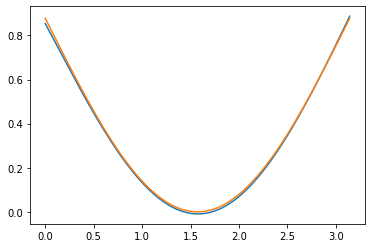

In [34]:

plt.plot(x_test, func2.detach().numpy())
plt.plot(x_test, (1 - np.sin(x_test))*np.cos(0.5))

In [35]:

#plt.plot(x_test, pred.detach().numpy())
#plt.plot(x_test, exact.detach().numpy())

In [36]:
#Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((func2 - p)**2)/torch.mean(p**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  83.87594223022461 %


In [37]:
torch.mean(torch.abs(func2-p))

tensor(0.3061, grad_fn=<MeanBackward0>)

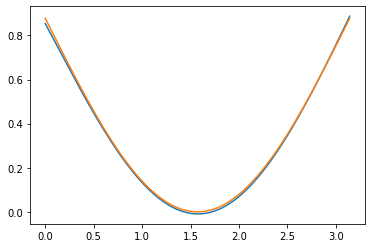

In [38]:

plt.plot(x_test, func2.detach().numpy())
plt.plot(x_test, p)

In [39]:
torch.mean(p-func2)**2/torch.mean(p)**2

tensor(0.0005, grad_fn=<DivBackward0>)

In [40]:
func2.shape

torch.Size([10000])

In [41]:
p.shape

torch.Size([10000, 1])

In [42]:
p = p.reshape(-1,)

In [43]:
#Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((func2 - p)**2)/torch.mean(p**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.048688511014916 %


In [44]:
# contour plot

In [45]:
x1 = pi*torch.rand(1000000)
t1 = 0.5*torch.rand(1000000)
x1 = x1.reshape(-1, 1)
t1 = t1.reshape(-1, 1)
s = torch.cat([x1, t1], 1)
u_pred = my_network(s)
func2 = u_pred[:,4].reshape(-1, )
func2 = func2.detach().numpy()
x1 = x1.reshape(-1, )
t1 = t1.reshape(-1, )
x1 = x1.detach().numpy()
t1 = t1.detach().numpy()
u_test = (1-np.sin(x1))*np.cos(t1)

print(func2.shape)
print(x1.shape)
print(t1.shape)

(1000000,)
(1000000,)
(1000000,)


In [46]:
r_f = np.abs(func2 - u_test)

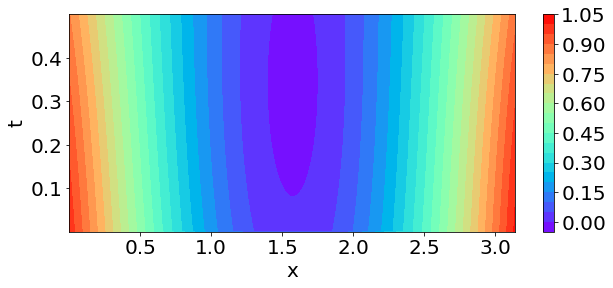

In [47]:
plt.rcParams['figure.figsize'] = [10, 4]
CS = plt.tricontourf(x1, t1, func2, 20, cmap='rainbow')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig('inverse_func_doublebeam_noise.png', dpi = 300, bbox_inches = "tight")
plt.show()

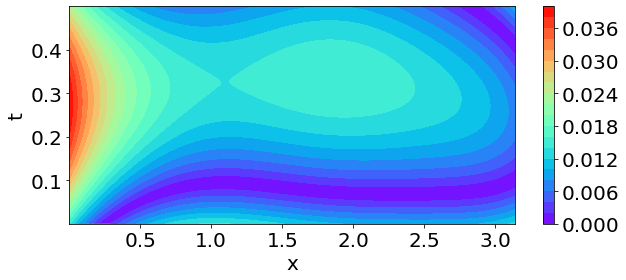

In [48]:
plt.rcParams['figure.figsize'] = [10, 4]

from matplotlib.font_manager import FontProperties
plt.rcParams['axes.unicode_minus'] = False
font_path = '/data/localhome/tkapoor/Desktop/Times_Roman_Fig/times-new-roman.ttf'
custom_font = FontProperties(fname=font_path)

CS = plt.tricontourf(x1, t1, r_f, 20, cmap='rainbow')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


cbar1 = plt.colorbar(CS1)
for t in cbar1.ax.get_yticklabels():
    t.set_fontproperties(custom_font)
    t.set_fontsize(20)

# g = 20
# plt.xlabel(r'$t$'.format(g))
# plt.ylabel(r'$x$'.format(g))
plt.xlabel('t', fontsize=20, fontproperties=custom_font)
plt.ylabel('x', fontsize=20, fontproperties=custom_font)
plt.xticks(fontsize=20, fontproperties=custom_font)
plt.yticks(fontsize=20, fontproperties=custom_font)
plt.savefig('13a.pdf', dpi = 300, bbox_inches = "tight")

In [49]:
exact = (1 - np.sin(x1))*np.cos(t1)

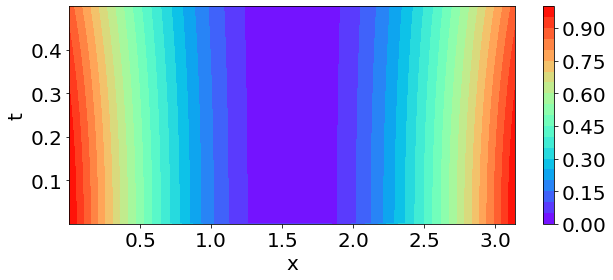

In [50]:
plt.rcParams['figure.figsize'] = [10, 4]
CS = plt.tricontourf(x1, t1, u_test, 20, cmap='rainbow')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('t', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig('inverse_func_doublebeam_noise.png', dpi = 300, bbox_inches = "tight")
plt.show()